In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import verde as vd
import harmonica as hm
import boule as bl
import ensaio
import pygmt
import pyproj


import warnings
warnings.filterwarnings("ignore")

## Carrega os dados grav

In [2]:
# path_gravity = ensaio.fetch_southern_africa_gravity(version=1)
# path_topography = ensaio.fetch_earth_topography(version=1)
# path_geoid  = ensaio.fetch_earth_geoid(version=1)

In [3]:
# data = pd.read_csv(path_gravity)
data = pd.read_csv('gravity_table.csv', delimiter=';')
data

Station     Reading      Time        Date  height_sea_level_m  \
0          1     2239.39  14:28:00  2019/12/03              147.94   
1          2     2239.41  15:12:00  2019/12/03              152.06   
2          3     2246.38  16:06:00  2019/12/03              117.30   
3          4     2245.71  16:46:00  2019/12/03              129.10   
4          5     2249.62  17:13:00  2019/12/03              130.01   
..       ...         ...       ...         ...                 ...   
222      223  2203015.00  17:06:00  2019/12/16              264.94   
223      224  2168435.00  09:38:00  2019/12/17              204.11   
224      225     2164.15  11:52:00  2019/12/17              226.73   
225      226  2135695.00  15:49:00  2019/12/17              443.57   
226      227     2165.48  16:38:00  2019/12/17              293.06   

                 X             Y  longitude   latitude   gravity_mgal  \
0    238246.104213  7.702141e+06 -41.514018 -20.762135  978591.406605   
1    239573.565307  7.702483e+06 -41.501226 -20.759230  978591.445776   
2    241216.748955  7.704176e+06 -41.485206 -20.744179  978598.473518   
3    243071.287960  7.702906e+06 -41.467595 -20.755897  978597.809879   
4    245332.547009  7.701803e+06 -41.446052 -20.766168  978601.745635   
..             ...           ...        ...        ...            ...   
222  245174.133206  7.717189e+06 -41.445344 -20.627243  978555.178643   
223  239604.189758  7.711266e+06 -41.499631 -20.679943  978573.732084   
224  237502.245723  7.711667e+06 -41.519734 -20.676036  978569.446411   
225  240697.890125  7.698939e+06 -41.490961 -20.791377  978540.768876   
226  235344.656608  7.697817e+06 -41.542518 -20.800757  978570.866953   

     TideCorr        Source  
0    0.053423  03122019_996  
1    0.066119  03122019_996  
2    0.077715  03122019_996  
3    0.081974  03122019_996  
4    0.082319  03122019_996  
..        ...           ...  
222  0.096166  16122019_996  
223 -0.030230  17122019_965  
224  0.024382  17122019_965  
225  0.125092  17122019_965  
226  0.119784  17122019_965  

[227 rows x 12 columns]

In [4]:
# print(np.max(data.latitude))
# print(np.min(data.latitude))
# print(np.max(data.longitude))
# print(np.min(data.longitude))


In [5]:
# topography = xr.load_dataarray(path_topography)
# geoid = xr.load_dataarray(path_geoid)

In [6]:
# West, East, South, North (degrees)
# region = (-42, -41, -21, -20)
# region = (-41.5569883888889, -41.2805198611111, -20.8007570833333, -20.5533338333333)
region = (-41.5572222222, -41.2802777778, -20.8008333333, -20.5533333333)
# Pad the region for slicing the grids
region_pad = vd.pad_region(region, pad=0.02)
# region = region_pad

In [7]:
topography = pygmt.datasets.load_earth_relief(resolution="01s", region=region_pad)
topography = topography.rename({'lon': 'longitude', 'lat': 'latitude'})
topography

<xarray.DataArray 'elevation' (latitude: 1051, longitude: 1156)>
array([[772., 763., 752., ..., 137., 134., 128.],
       [783., 771., 760., ..., 136., 132., 126.],
       [789., 779., 764., ..., 134., 129., 122.],
       ...,
       [770., 777., 786., ..., 260., 265., 269.],
       [783., 789., 798., ..., 261., 265., 271.],
       [796., 803., 810., ..., 259., 261., 267.]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.53 -20.53 -20.53
Attributes:
    long_name:         Earth elevation relative to the geoid
    cpt:               geo
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [8]:
# data = data[vd.inside((data.Longitude, data.Latitude), region)]
# data

In [9]:
# geoid = geoid.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
# geoid = -5.6 # constante

In [10]:
topography = topography.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
# topography = topography.sel(lon=slice(*region_pad[:2]), lat=slice(*region_pad[2:]))
topography

<xarray.DataArray 'elevation' (latitude: 1035, longitude: 1140)>
array([[682., 690., 696., ..., 106., 107., 113.],
       [686., 697., 702., ..., 107., 108., 115.],
       [689., 697., 707., ..., 106., 108., 114.],
       ...,
       [820., 806., 795., ..., 279., 281., 281.],
       [827., 816., 806., ..., 280., 283., 286.],
       [830., 821., 812., ..., 288., 294., 301.]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.53 -20.53 -20.53
Attributes:
    long_name:         Earth elevation relative to the geoid
    cpt:               geo
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [11]:
# Criar uma cópia com valores constantes
# constant_value = -5.6
# geoid = topography.copy()
# geoid.values = np.ones(np.shape(topography.values))*constant_value
# geoid

path_geoid  = ensaio.fetch_earth_geoid(version=1)
geoid = xr.load_dataarray(path_geoid)
geoid = geoid.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
interpolator = vd.KNeighbors()

geoid_table = vd.grid_to_table(geoid)
geoid_1 = vd.grid_to_table(topography)


interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.geoid)
geoid_1 = geoid_1.assign(elevation=interpolator.predict((geoid_1.longitude, geoid_1.latitude)))

geoid_values = np.reshape(geoid_1.elevation, topography.shape)
geoid = xr.DataArray(geoid_values, coords=[topography.latitude, topography.longitude], dims=['latitude', 'longitude'])
geoid

<xarray.DataArray (latitude: 1035, longitude: 1140)>
array([[-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       ...,
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3],
       [-5.6, -5.6, -5.6, ..., -6.3, -6.3, -6.3]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.53 -20.53 -20.53
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26

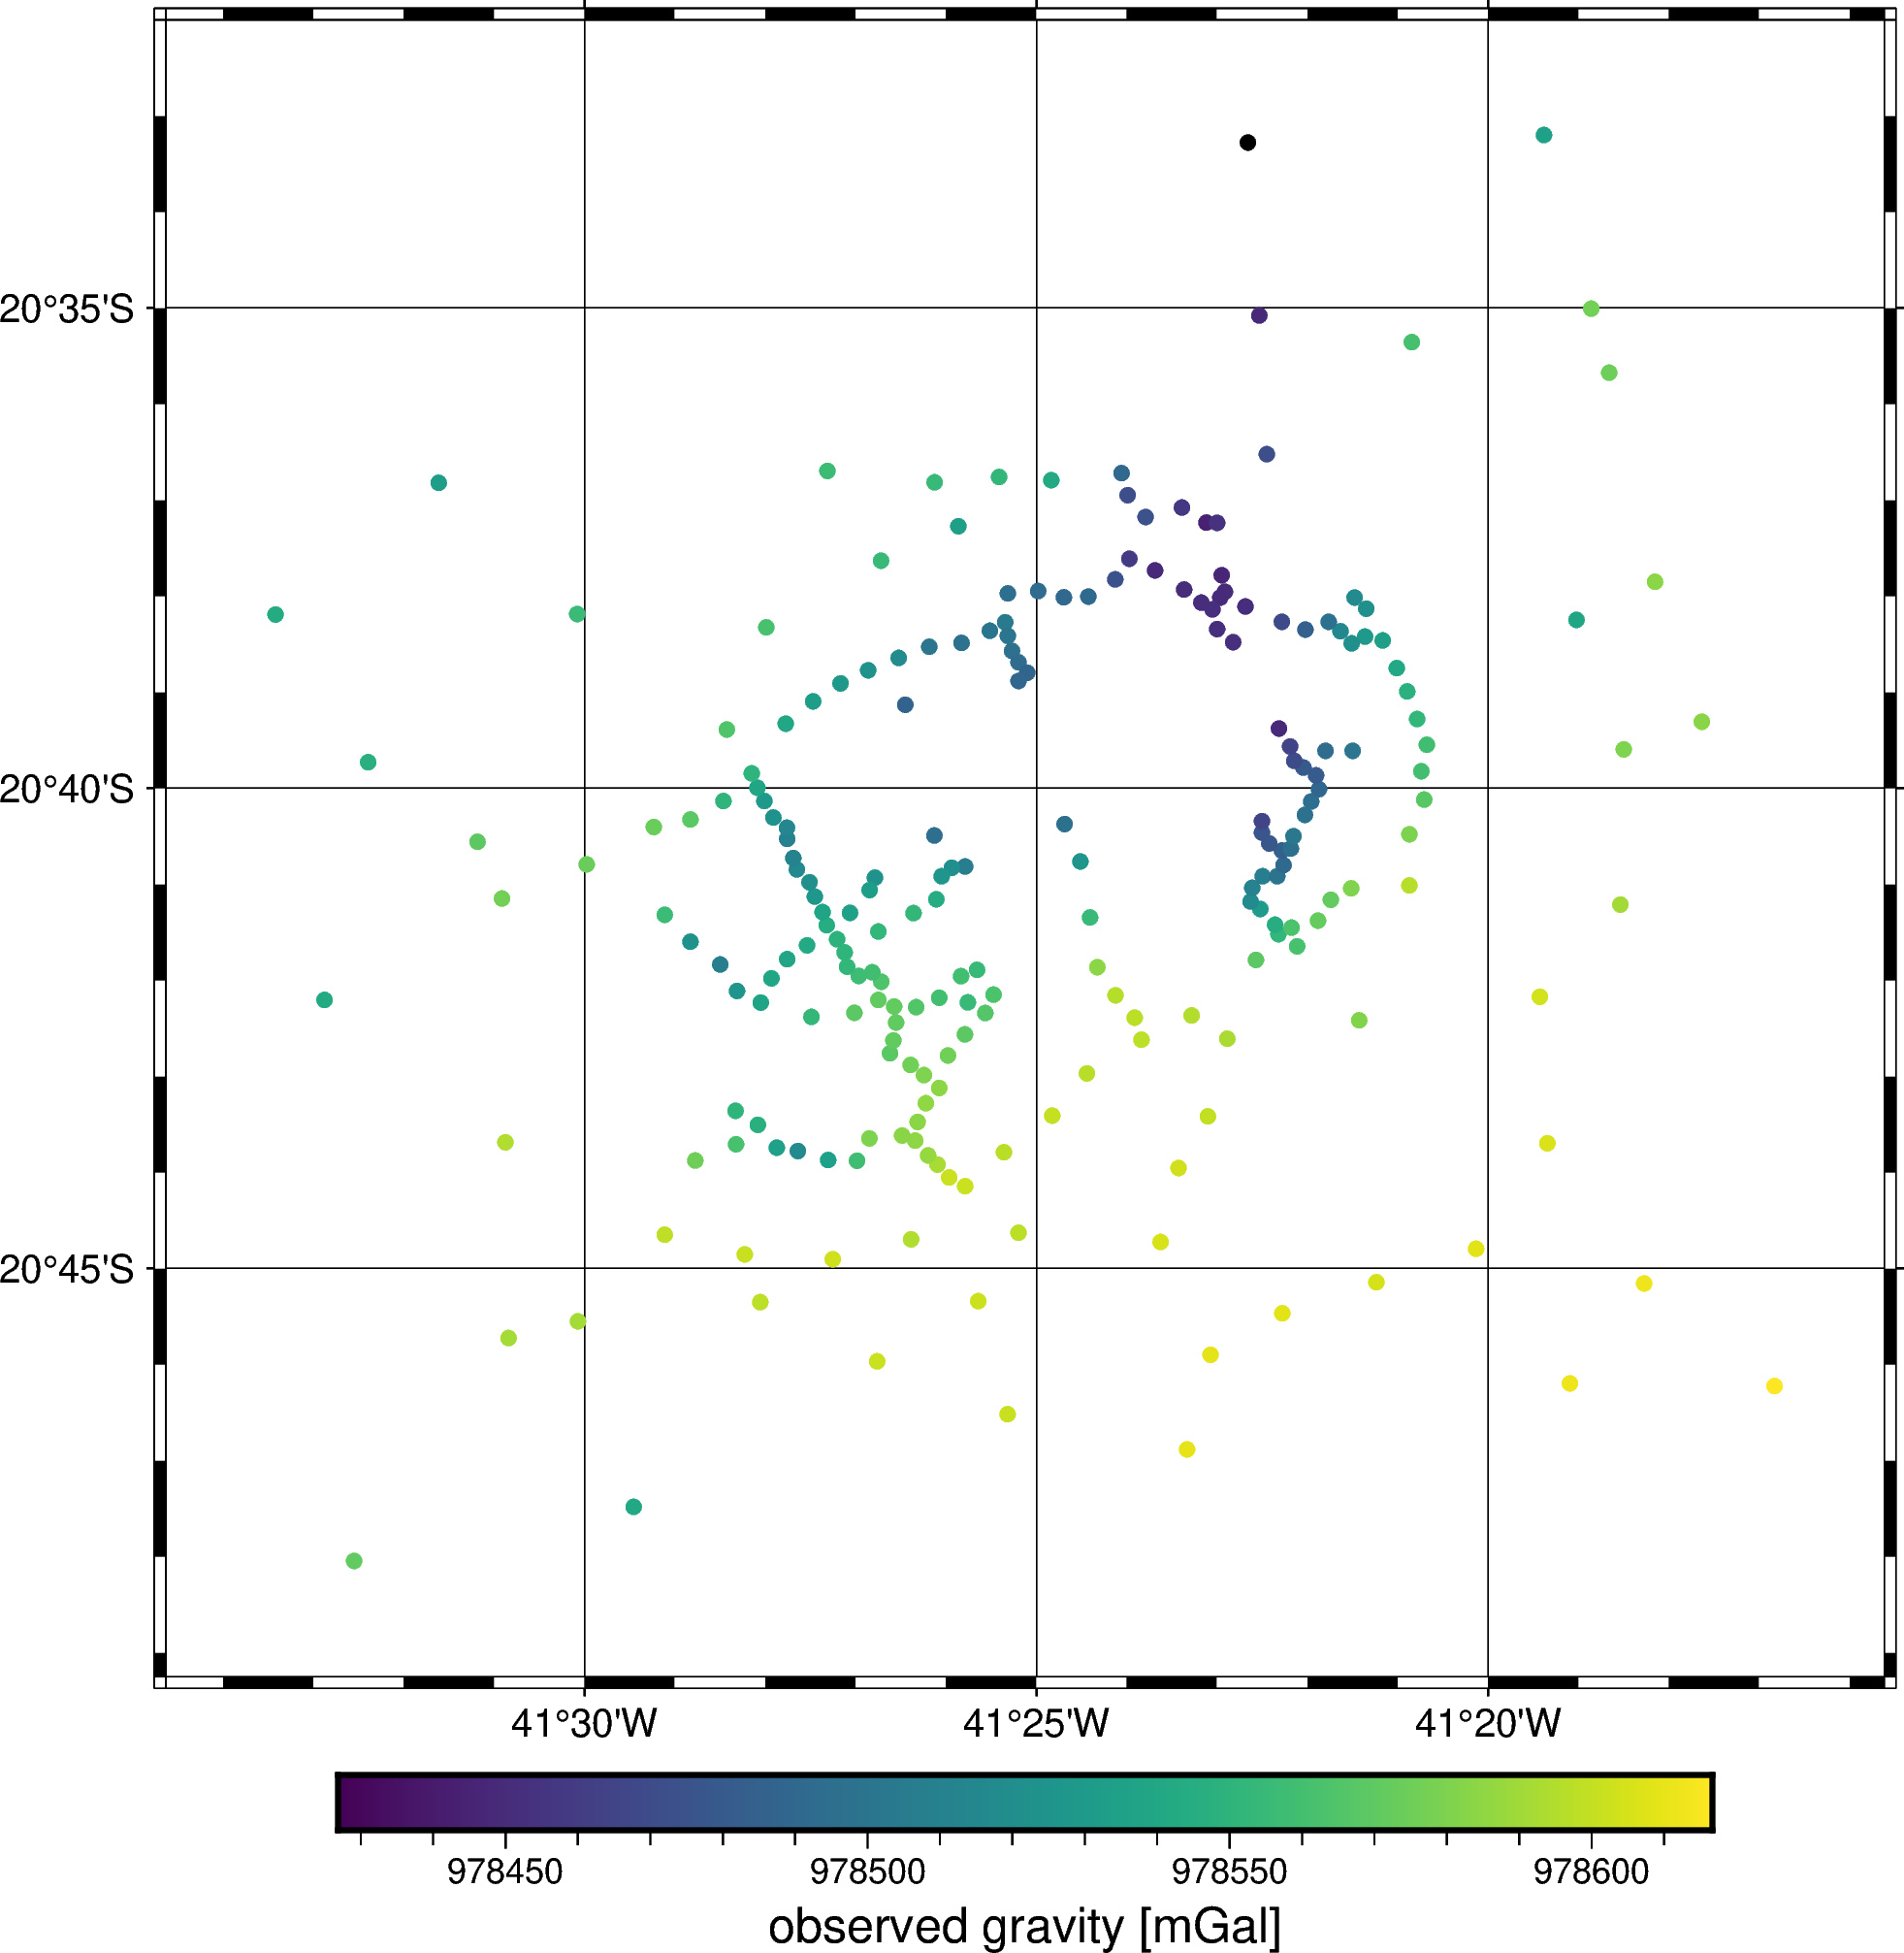

In [12]:
fig = pygmt.Figure()
pygmt.makecpt(cmap="viridis", series=[data.gravity_mgal.min(), data.gravity_mgal.max()])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="afg",
)
fig.colorbar(frame='af+l"observed gravity [mGal]"')
fig.show(width=600)

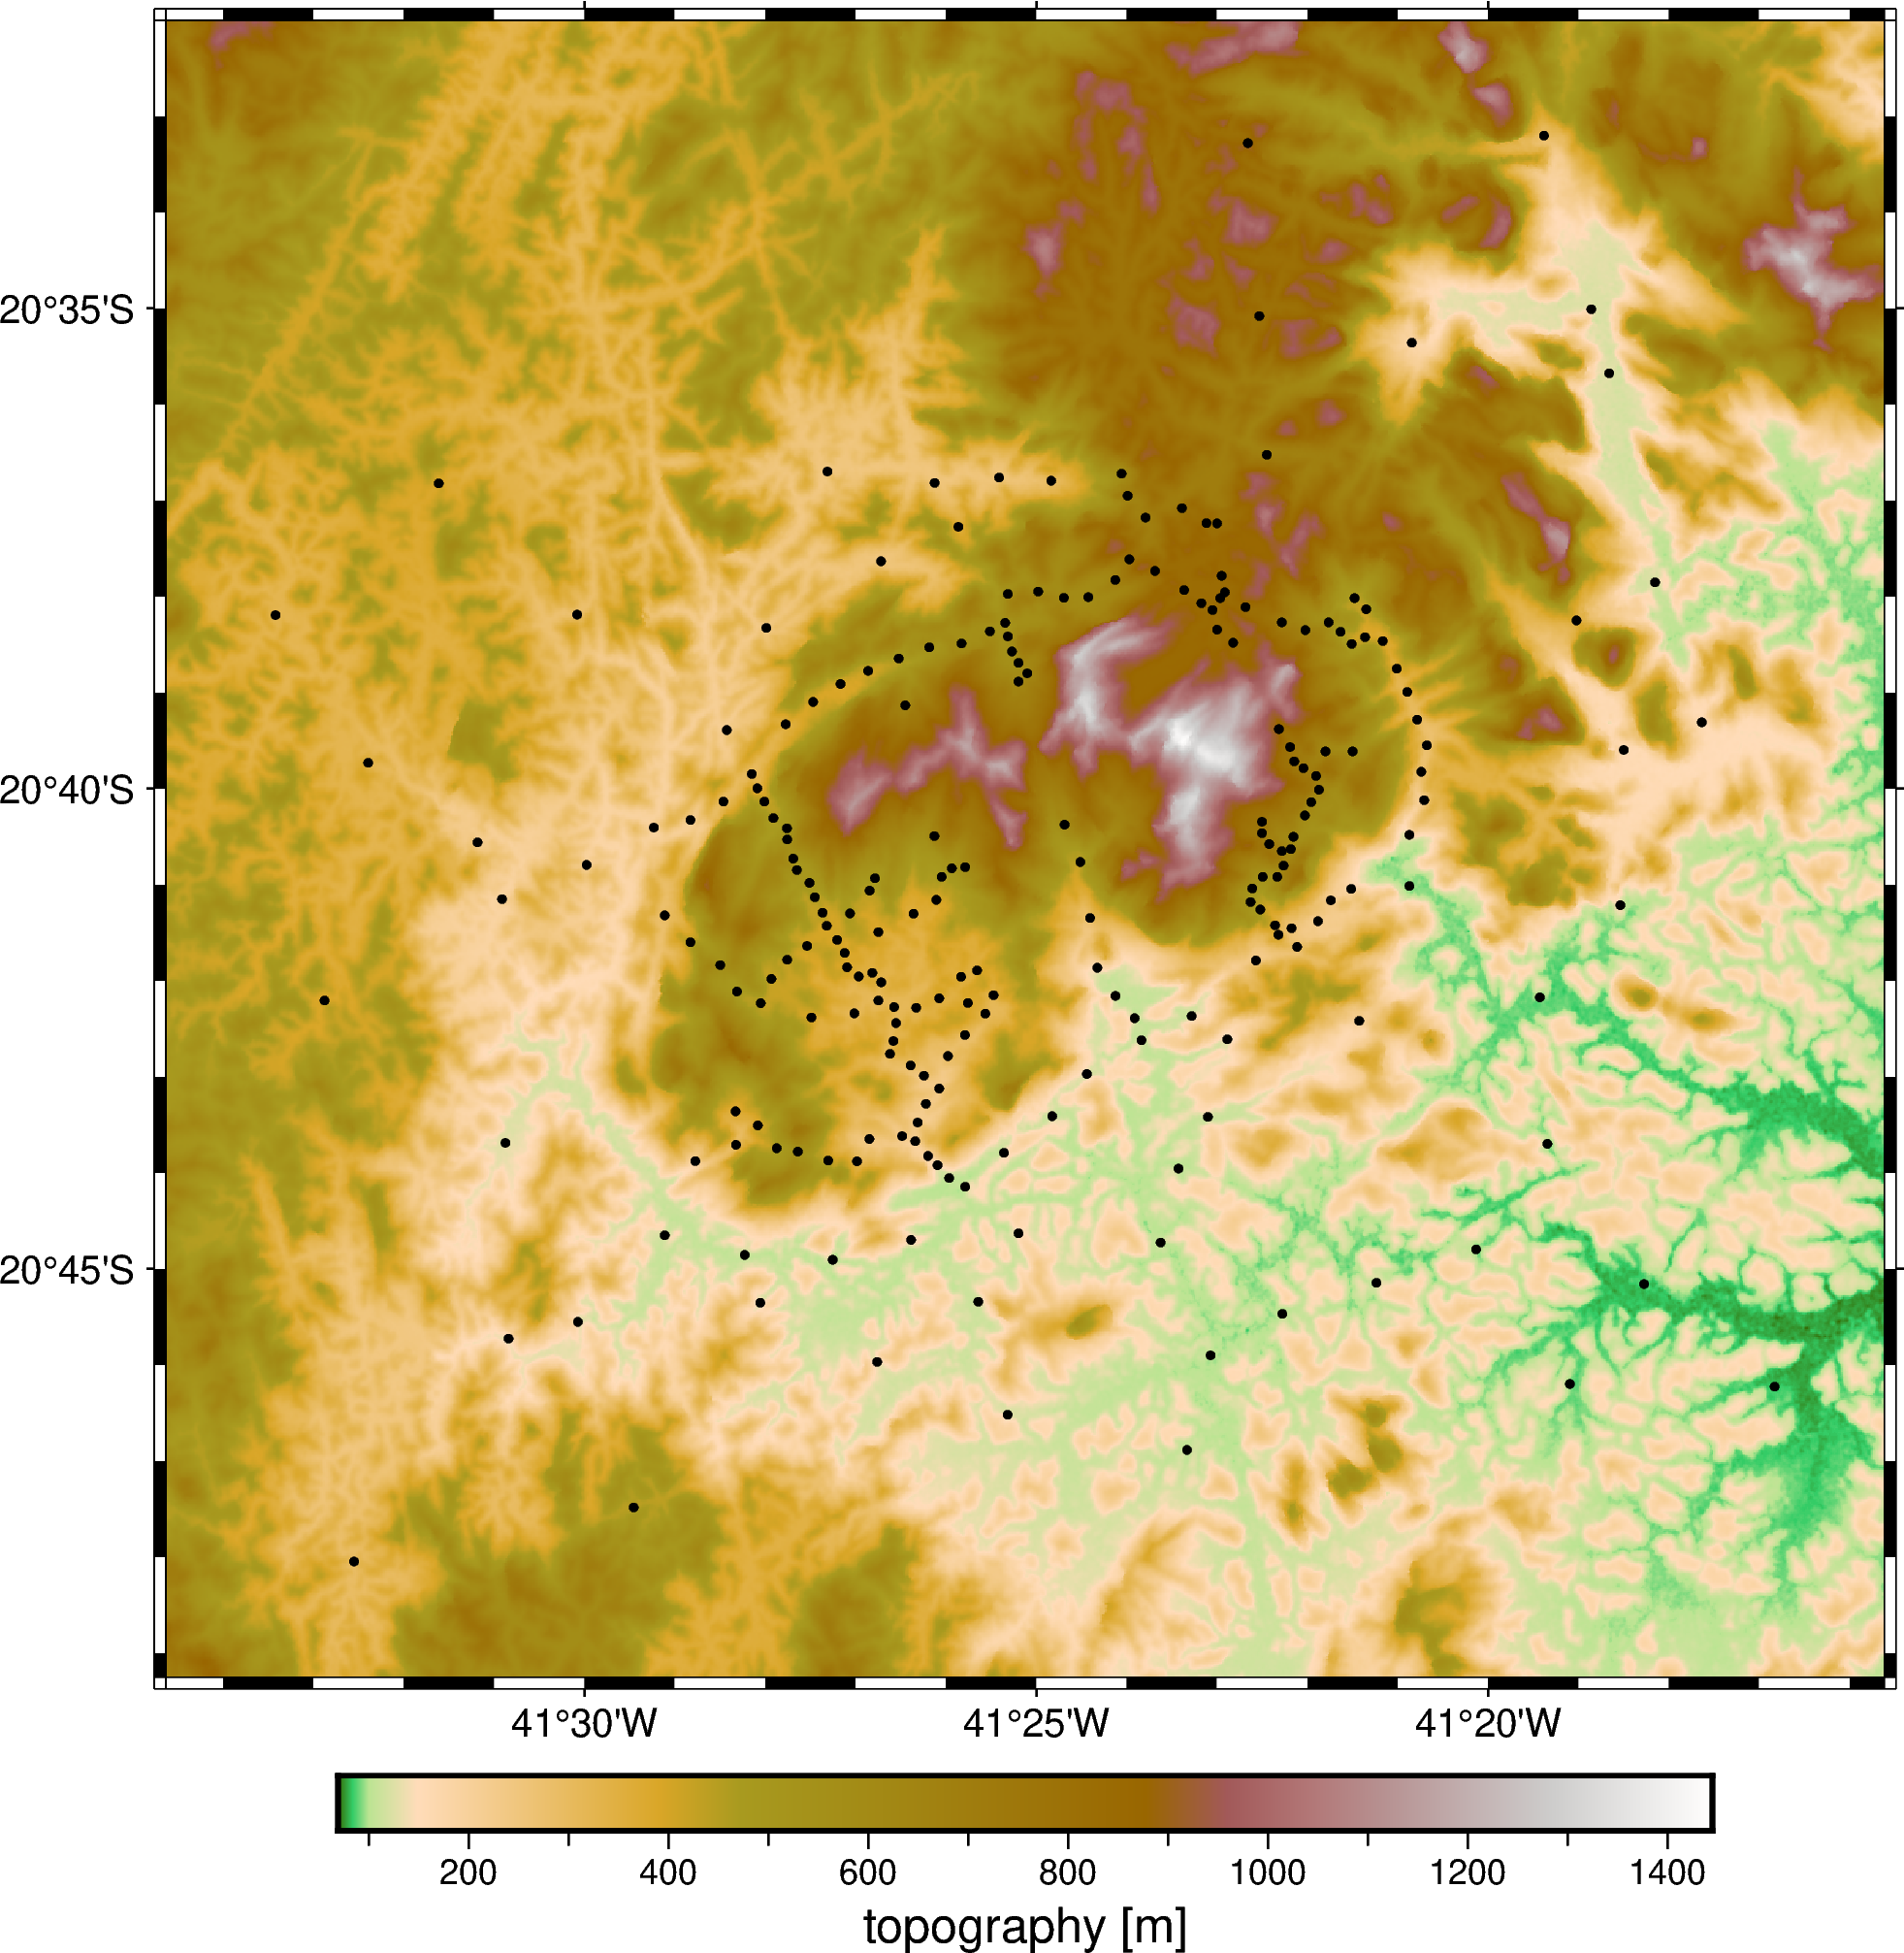

In [13]:
fig = pygmt.Figure()
fig.grdimage(topography, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.08c",
    color="black",
)
fig.show(width=600)

## Converte altitudes ortométricas para geométricas

In [14]:
topography_geometric = topography + geoid
topography_geometric

<xarray.DataArray (latitude: 1035, longitude: 1140)>
array([[676.4, 684.4, 690.4, ...,  99.7, 100.7, 106.7],
       [680.4, 691.4, 696.4, ..., 100.7, 101.7, 108.7],
       [683.4, 691.4, 701.4, ...,  99.7, 101.7, 107.7],
       ...,
       [814.4, 800.4, 789.4, ..., 272.7, 274.7, 274.7],
       [821.4, 810.4, 800.4, ..., 273.7, 276.7, 279.7],
       [824.4, 815.4, 806.4, ..., 281.7, 287.7, 294.7]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.58 -41.58 -41.58 ... -41.26 -41.26 -41.26
  * latitude   (latitude) float64 -20.82 -20.82 -20.82 ... -20.53 -20.53 -20.53

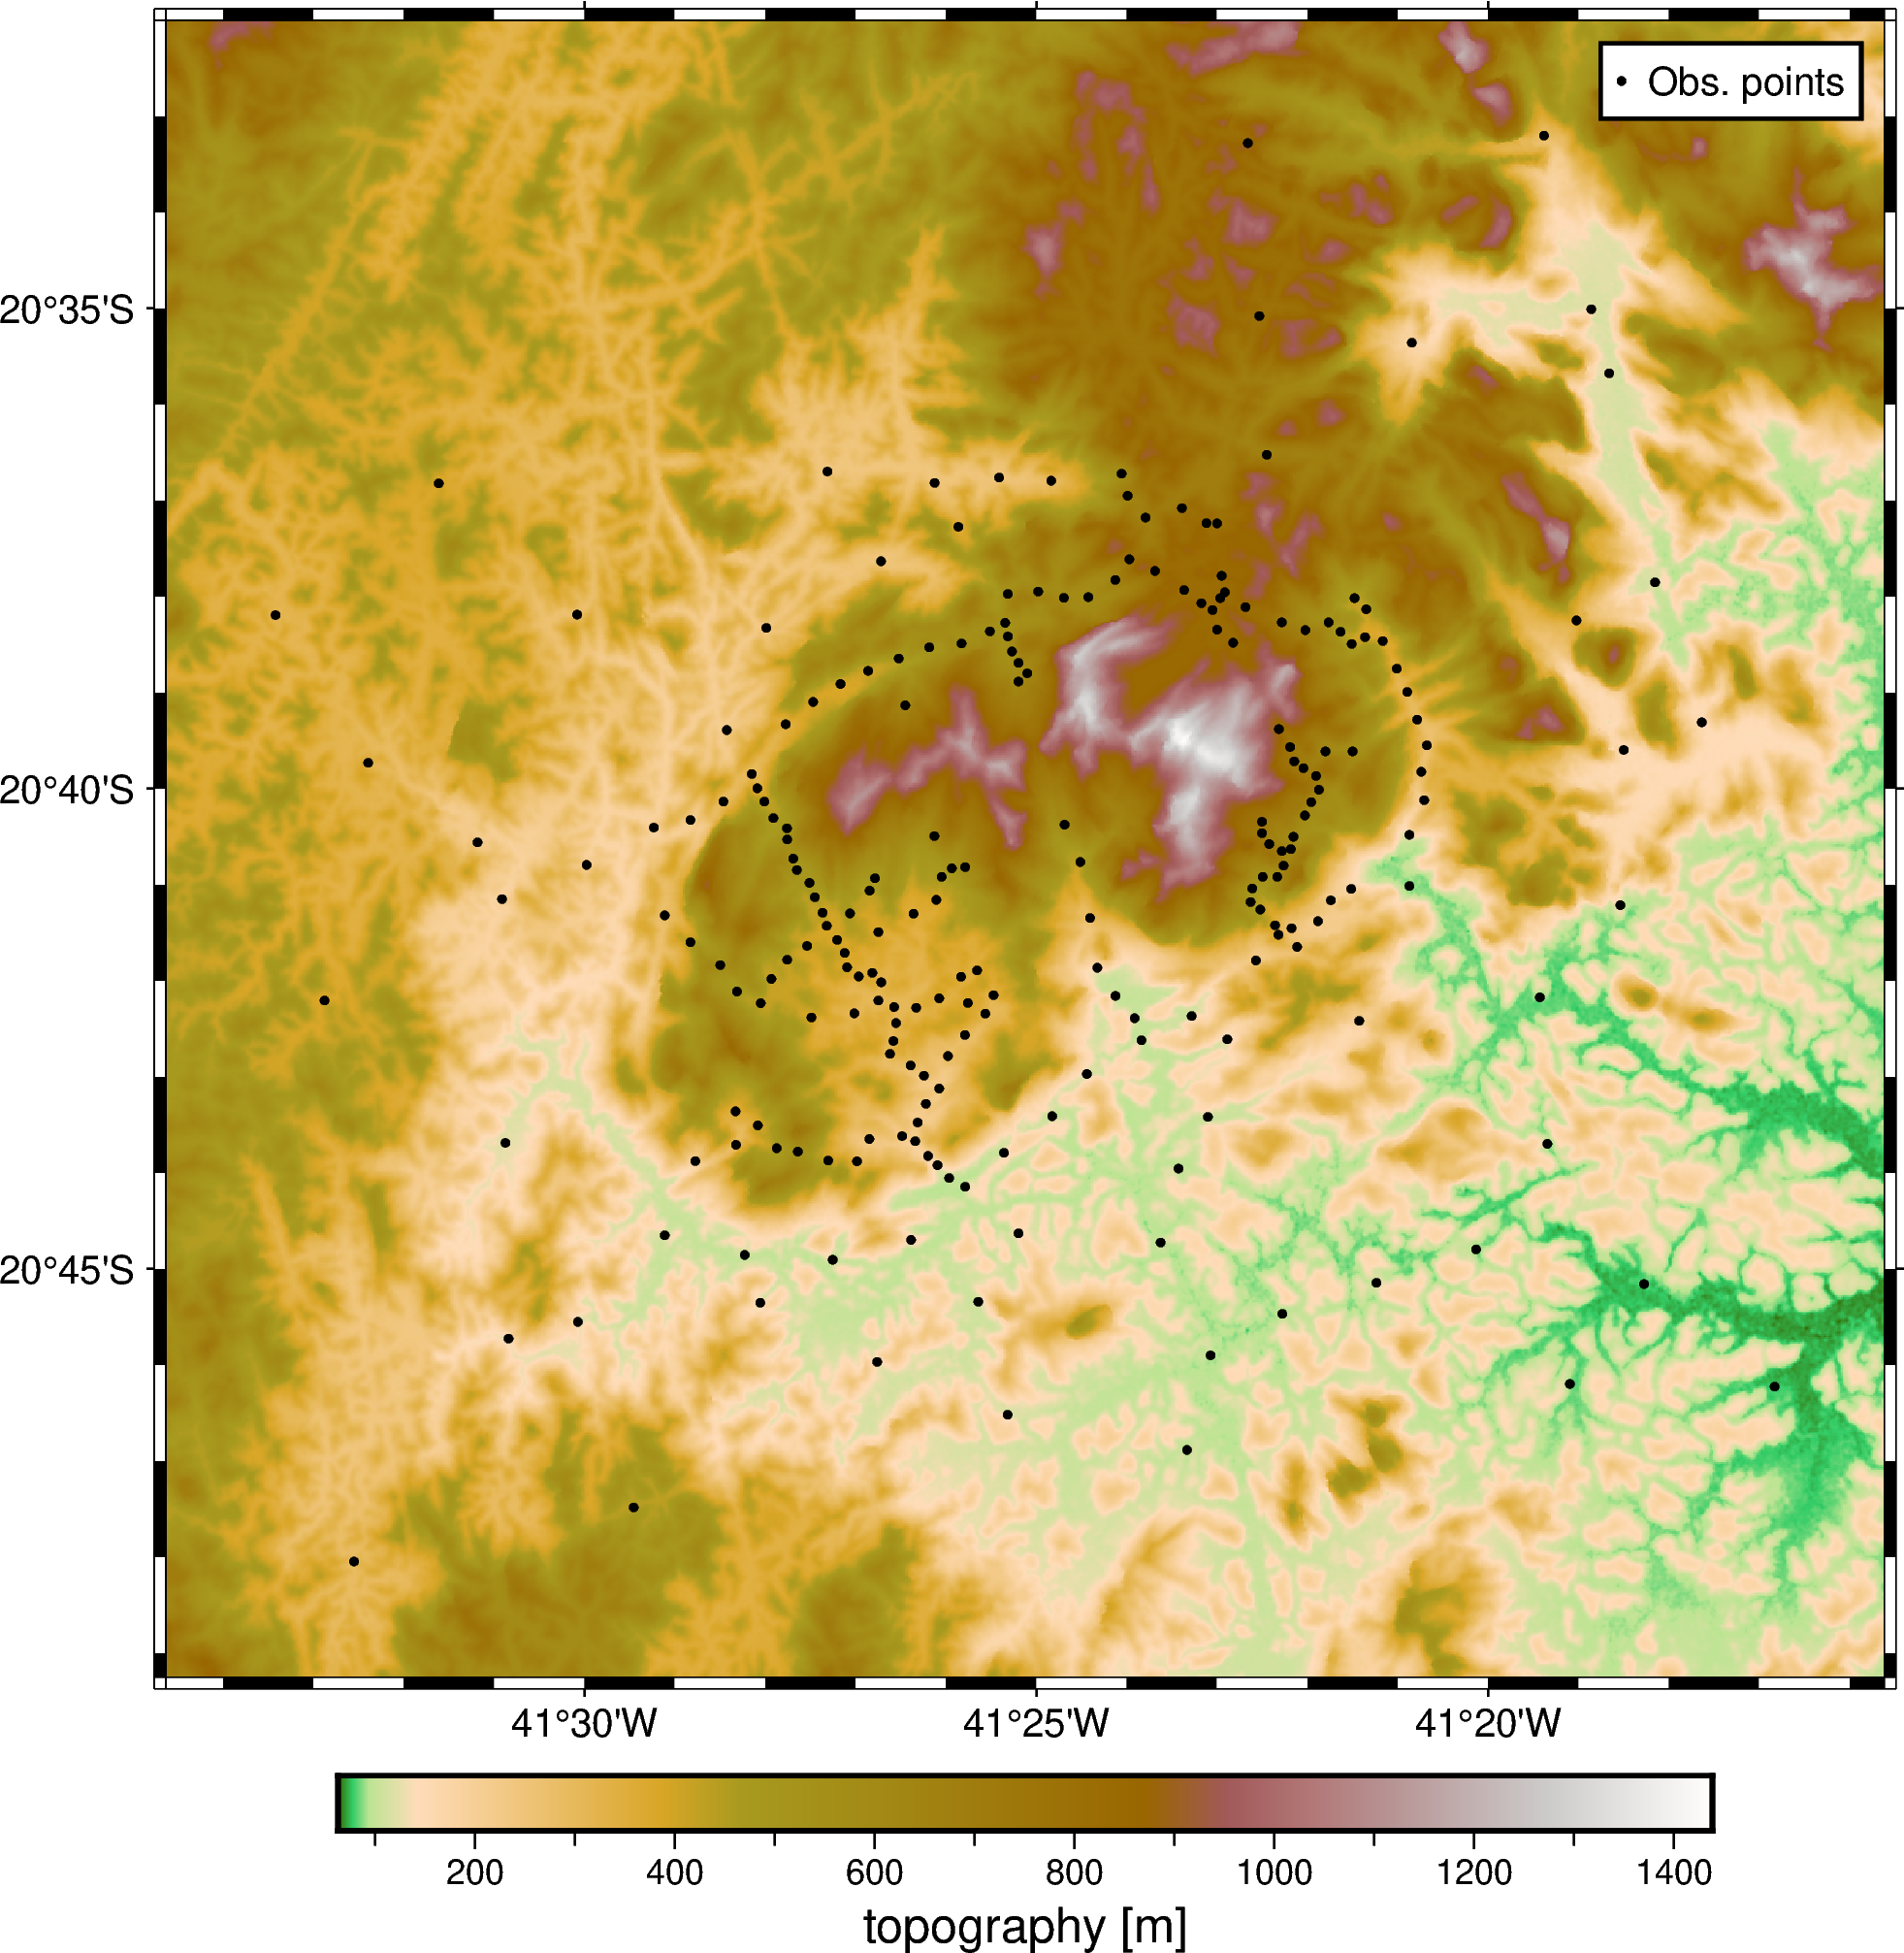

In [15]:
fig = pygmt.Figure()
fig.grdimage(topography_geometric, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.08c",
    color="black",
    label='Obs. points'
)
fig.legend()
fig.show(width=600)

In [16]:
geoid_table = vd.grid_to_table(geoid)
interpolator = vd.KNeighbors()
interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.scalars)
data = data.assign(geoid_m=interpolator.predict((data.longitude, data.latitude)))
data = data.assign(height_geometric_m=data.height_sea_level_m + data.geoid_m)
# data
# geoid_table

## Distúrbio da gravidade

In [17]:
data = data.assign(
    normal_gravity_mgal=bl.WGS84.normal_gravity(data.latitude, data.height_geometric_m)
)
data = data.assign(gravity_disturbance_mgal=data.gravity_mgal - data.normal_gravity_mgal)
data

Station     Reading      Time        Date  height_sea_level_m  \
0          1     2239.39  14:28:00  2019/12/03              147.94   
1          2     2239.41  15:12:00  2019/12/03              152.06   
2          3     2246.38  16:06:00  2019/12/03              117.30   
3          4     2245.71  16:46:00  2019/12/03              129.10   
4          5     2249.62  17:13:00  2019/12/03              130.01   
..       ...         ...       ...         ...                 ...   
222      223  2203015.00  17:06:00  2019/12/16              264.94   
223      224  2168435.00  09:38:00  2019/12/17              204.11   
224      225     2164.15  11:52:00  2019/12/17              226.73   
225      226  2135695.00  15:49:00  2019/12/17              443.57   
226      227     2165.48  16:38:00  2019/12/17              293.06   

                 X             Y  longitude   latitude   gravity_mgal  \
0    238246.104213  7.702141e+06 -41.514018 -20.762135  978591.406605   
1    239573.565307  7.702483e+06 -41.501226 -20.759230  978591.445776   
2    241216.748955  7.704176e+06 -41.485206 -20.744179  978598.473518   
3    243071.287960  7.702906e+06 -41.467595 -20.755897  978597.809879   
4    245332.547009  7.701803e+06 -41.446052 -20.766168  978601.745635   
..             ...           ...        ...        ...            ...   
222  245174.133206  7.717189e+06 -41.445344 -20.627243  978555.178643   
223  239604.189758  7.711266e+06 -41.499631 -20.679943  978573.732084   
224  237502.245723  7.711667e+06 -41.519734 -20.676036  978569.446411   
225  240697.890125  7.698939e+06 -41.490961 -20.791377  978540.768876   
226  235344.656608  7.697817e+06 -41.542518 -20.800757  978570.866953   

     TideCorr        Source  geoid_m  height_geometric_m  normal_gravity_mgal  \
0    0.053423  03122019_996     -5.6              142.34        978637.755893   
1    0.066119  03122019_996     -5.6              146.46        978636.310346   
2    0.077715  03122019_996     -5.6              111.70        978646.141191   
3    0.081974  03122019_996     -5.6              123.50        978643.198869   
4    0.082319  03122019_996     -5.6              124.41        978643.532181   
..        ...           ...      ...                 ...                  ...   
222  0.096166  16122019_996     -5.6              259.34        978593.592668   
223 -0.030230  17122019_965     -5.6              198.51        978615.508625   
224  0.024382  17122019_965     -5.6              221.13        978608.293091   
225  0.125092  17122019_965     -5.6              437.97        978548.250028   
226  0.119784  17122019_965     -5.6              287.46        978595.269947   

     gravity_disturbance_mgal  
0                  -46.349288  
1                  -44.864570  
2                  -47.667672  
3                  -45.388990  
4                  -41.786546  
..                        ...  
222                -38.414026  
223                -41.776541  
224                -38.846680  
225                 -7.481152  
226                -24.402994  

[227 rows x 16 columns]

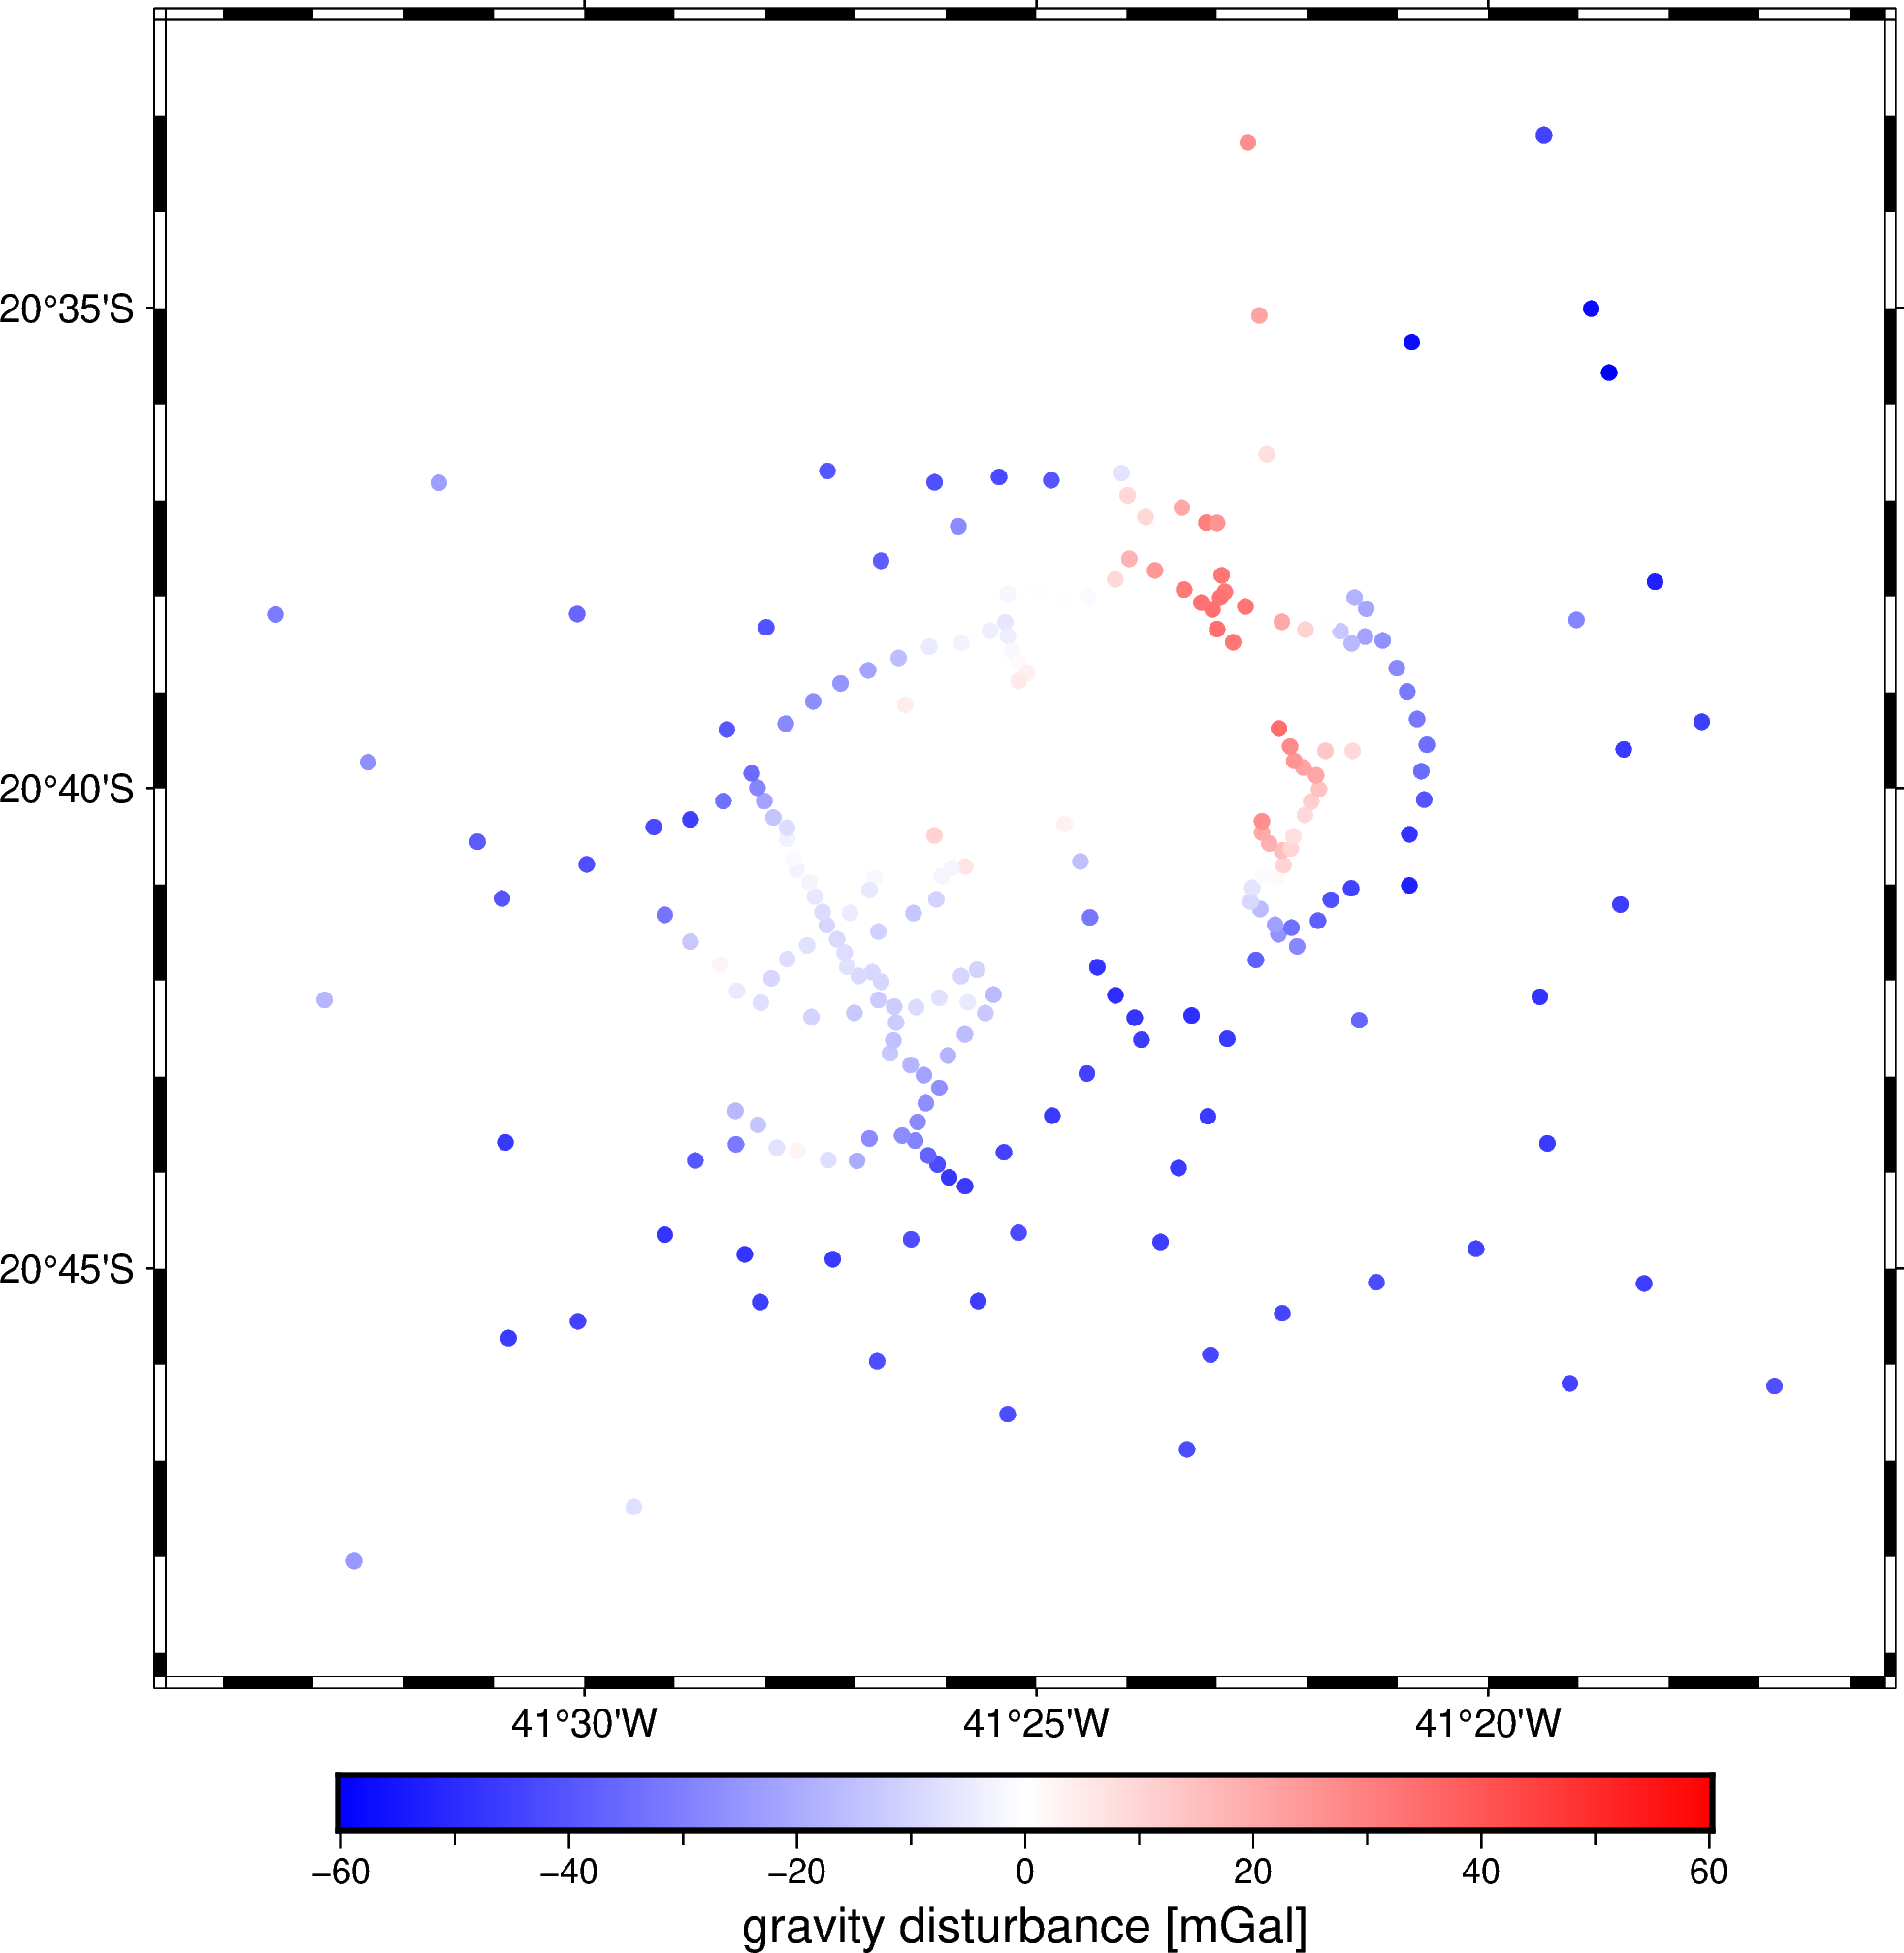

In [18]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_disturbance_mgal)
pygmt.makecpt(cmap="polar+h", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_disturbance_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="af",
)
fig.colorbar(frame='af+l"gravity disturbance [mGal]"')
fig.show(width=600)

## Correção topográfica

![](https://www.fatiando.org/tutorials/_images/topographic-correction.svg)

In [19]:
# projection = pyproj.Proj(proj="merc", lat_ts=data.latitude.mean())
projection = pyproj.Proj(proj='utm', ellps='WGS84', zone=24, south=True)

In [20]:
easting, northing = projection(data.longitude.values, data.latitude.values)
data = data.assign(easting_m=easting, northing_m=northing)
data

Station     Reading      Time        Date  height_sea_level_m  \
0          1     2239.39  14:28:00  2019/12/03              147.94   
1          2     2239.41  15:12:00  2019/12/03              152.06   
2          3     2246.38  16:06:00  2019/12/03              117.30   
3          4     2245.71  16:46:00  2019/12/03              129.10   
4          5     2249.62  17:13:00  2019/12/03              130.01   
..       ...         ...       ...         ...                 ...   
222      223  2203015.00  17:06:00  2019/12/16              264.94   
223      224  2168435.00  09:38:00  2019/12/17              204.11   
224      225     2164.15  11:52:00  2019/12/17              226.73   
225      226  2135695.00  15:49:00  2019/12/17              443.57   
226      227     2165.48  16:38:00  2019/12/17              293.06   

                 X             Y  longitude   latitude   gravity_mgal  \
0    238246.104213  7.702141e+06 -41.514018 -20.762135  978591.406605   
1    239573.565307  7.702483e+06 -41.501226 -20.759230  978591.445776   
2    241216.748955  7.704176e+06 -41.485206 -20.744179  978598.473518   
3    243071.287960  7.702906e+06 -41.467595 -20.755897  978597.809879   
4    245332.547009  7.701803e+06 -41.446052 -20.766168  978601.745635   
..             ...           ...        ...        ...            ...   
222  245174.133206  7.717189e+06 -41.445344 -20.627243  978555.178643   
223  239604.189758  7.711266e+06 -41.499631 -20.679943  978573.732084   
224  237502.245723  7.711667e+06 -41.519734 -20.676036  978569.446411   
225  240697.890125  7.698939e+06 -41.490961 -20.791377  978540.768876   
226  235344.656608  7.697817e+06 -41.542518 -20.800757  978570.866953   

     TideCorr        Source  geoid_m  height_geometric_m  normal_gravity_mgal  \
0    0.053423  03122019_996     -5.6              142.34        978637.755893   
1    0.066119  03122019_996     -5.6              146.46        978636.310346   
2    0.077715  03122019_996     -5.6              111.70        978646.141191   
3    0.081974  03122019_996     -5.6              123.50        978643.198869   
4    0.082319  03122019_996     -5.6              124.41        978643.532181   
..        ...           ...      ...                 ...                  ...   
222  0.096166  16122019_996     -5.6              259.34        978593.592668   
223 -0.030230  17122019_965     -5.6              198.51        978615.508625   
224  0.024382  17122019_965     -5.6              221.13        978608.293091   
225  0.125092  17122019_965     -5.6              437.97        978548.250028   
226  0.119784  17122019_965     -5.6              287.46        978595.269947   

     gravity_disturbance_mgal      easting_m    northing_m  
0                  -46.349288  238246.104213  7.702141e+06  
1                  -44.864570  239573.565308  7.702483e+06  
2                  -47.667672  241216.748956  7.704176e+06  
3                  -45.388990  243071.287960  7.702906e+06  
4                  -41.786546  245332.547009  7.701803e+06  
..                        ...            ...           ...  
222                -38.414026  245174.133206  7.717189e+06  
223                -41.776541  239604.189759  7.711266e+06  
224                -38.846680  237502.245723  7.711667e+06  
225                 -7.481152  240697.890126  7.698939e+06  
226                -24.402994  235344.656609  7.697817e+06  

[227 rows x 18 columns]

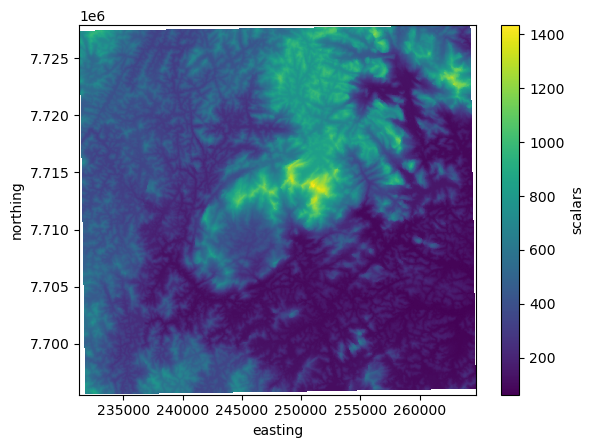

In [21]:
topography_proj = vd.project_grid(topography_geometric, projection, method="nearest")

# topography_proj.values = topography_geometric.values

topography_proj.plot()

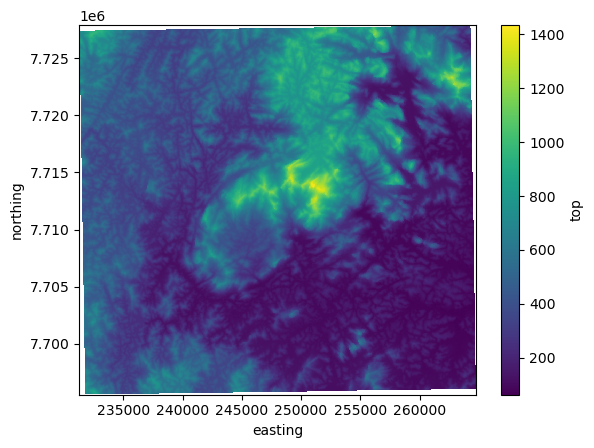

In [22]:
topography_density = np.where(topography_proj > 0, 2670, 1040 - 2670)
topography_model = hm.prism_layer(
    coordinates=(topography_proj.easting, topography_proj.northing),
    surface=topography_proj,
    reference=0,
    properties={"density": topography_density}
)

topography_model.top.plot()

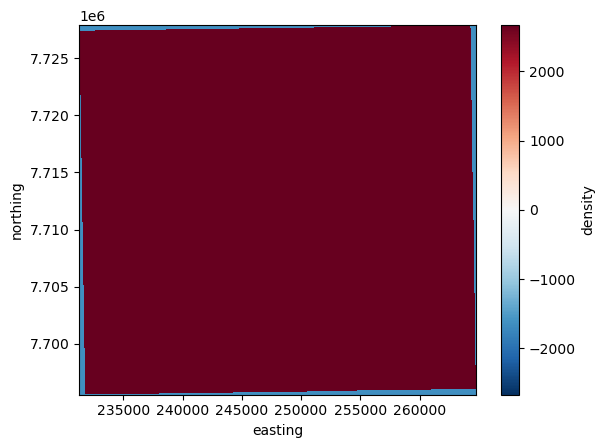

In [23]:
# fig = pygmt.Figure()
# scale = vd.maxabs(topography_model.density)
# pygmt.makecpt(cmap="roma+h", reverse=True, series=[-scale, scale])
# fig.grdimage(topography_model.density, projection="X15c/15c", frame=True)
# fig.colorbar(frame='af+l"Density of the prism model [kg/m3]"')
# fig.show()

topography_model.density.plot()

In [24]:
coordinates = (data.easting_m, data.northing_m, data.height_geometric_m)
terrain_effect = topography_model.prism_layer.gravity(coordinates, field="g_z")

In [25]:
data = data.assign(
    gravity_bouguer_mgal=data.gravity_disturbance_mgal - terrain_effect
)
data

Station     Reading      Time        Date  height_sea_level_m  \
0          1     2239.39  14:28:00  2019/12/03              147.94   
1          2     2239.41  15:12:00  2019/12/03              152.06   
2          3     2246.38  16:06:00  2019/12/03              117.30   
3          4     2245.71  16:46:00  2019/12/03              129.10   
4          5     2249.62  17:13:00  2019/12/03              130.01   
..       ...         ...       ...         ...                 ...   
222      223  2203015.00  17:06:00  2019/12/16              264.94   
223      224  2168435.00  09:38:00  2019/12/17              204.11   
224      225     2164.15  11:52:00  2019/12/17              226.73   
225      226  2135695.00  15:49:00  2019/12/17              443.57   
226      227     2165.48  16:38:00  2019/12/17              293.06   

                 X             Y  longitude   latitude   gravity_mgal  \
0    238246.104213  7.702141e+06 -41.514018 -20.762135  978591.406605   
1    239573.565307  7.702483e+06 -41.501226 -20.759230  978591.445776   
2    241216.748955  7.704176e+06 -41.485206 -20.744179  978598.473518   
3    243071.287960  7.702906e+06 -41.467595 -20.755897  978597.809879   
4    245332.547009  7.701803e+06 -41.446052 -20.766168  978601.745635   
..             ...           ...        ...        ...            ...   
222  245174.133206  7.717189e+06 -41.445344 -20.627243  978555.178643   
223  239604.189758  7.711266e+06 -41.499631 -20.679943  978573.732084   
224  237502.245723  7.711667e+06 -41.519734 -20.676036  978569.446411   
225  240697.890125  7.698939e+06 -41.490961 -20.791377  978540.768876   
226  235344.656608  7.697817e+06 -41.542518 -20.800757  978570.866953   

     TideCorr        Source  geoid_m  height_geometric_m  normal_gravity_mgal  \
0    0.053423  03122019_996     -5.6              142.34        978637.755893   
1    0.066119  03122019_996     -5.6              146.46        978636.310346   
2    0.077715  03122019_996     -5.6              111.70        978646.141191   
3    0.081974  03122019_996     -5.6              123.50        978643.198869   
4    0.082319  03122019_996     -5.6              124.41        978643.532181   
..        ...           ...      ...                 ...                  ...   
222  0.096166  16122019_996     -5.6              259.34        978593.592668   
223 -0.030230  17122019_965     -5.6              198.51        978615.508625   
224  0.024382  17122019_965     -5.6              221.13        978608.293091   
225  0.125092  17122019_965     -5.6              437.97        978548.250028   
226  0.119784  17122019_965     -5.6              287.46        978595.269947   

     gravity_disturbance_mgal      easting_m    northing_m  \
0                  -46.349288  238246.104213  7.702141e+06   
1                  -44.864570  239573.565308  7.702483e+06   
2                  -47.667672  241216.748956  7.704176e+06   
3                  -45.388990  243071.287960  7.702906e+06   
4                  -41.786546  245332.547009  7.701803e+06   
..                        ...            ...           ...   
222                -38.414026  245174.133206  7.717189e+06   
223                -41.776541  239604.189759  7.711266e+06   
224                -38.846680  237502.245723  7.711667e+06   
225                 -7.481152  240697.890126  7.698939e+06   
226                -24.402994  235344.656609  7.697817e+06   

     gravity_bouguer_mgal  
0              -57.329386  
1              -57.635391  
2              -58.102189  
3              -55.828249  
4              -53.301499  
..                    ...  
222            -61.985274  
223            -60.396328  
224            -60.471629  
225            -53.266179  
226            -53.688272  

[227 rows x 19 columns]

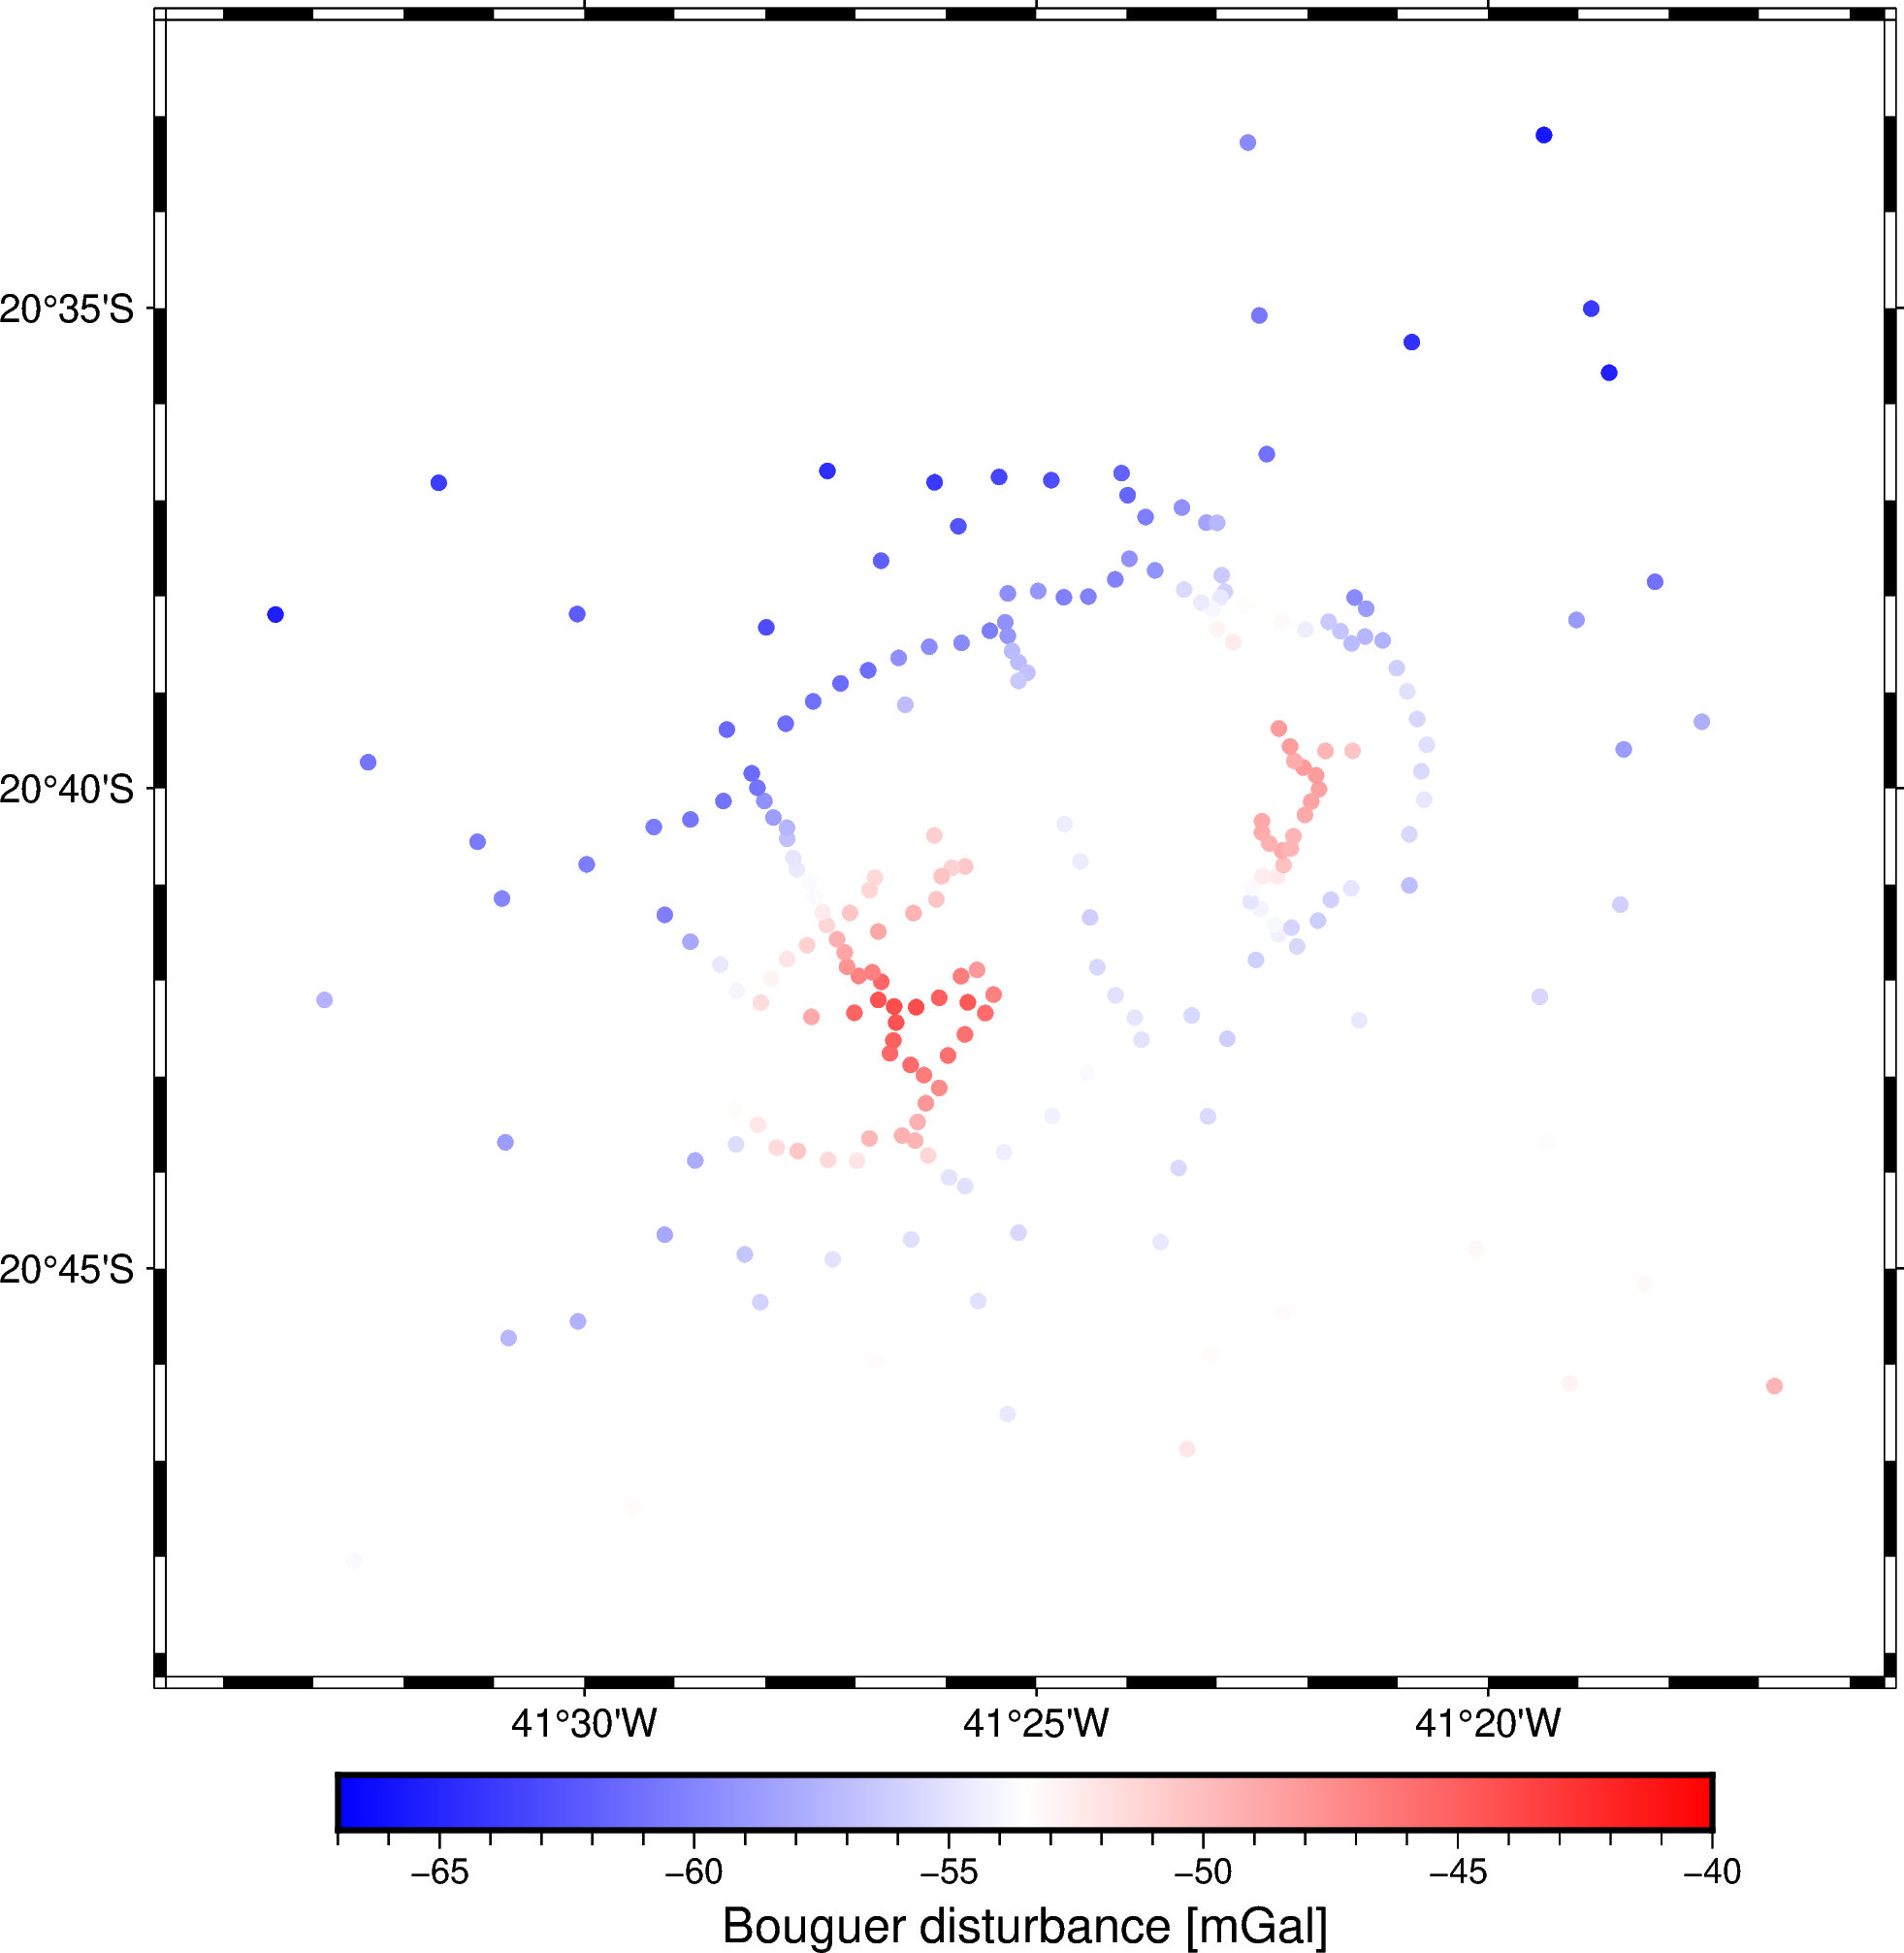

In [26]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_bouguer_mgal)
pygmt.makecpt(cmap="polar", series=[-67, -40])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_bouguer_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Bouguer disturbance [mGal]"')
fig.show()

## Separação regional residual

In [27]:
regional = vd.Trend(degree=1).fit(coordinates, data.gravity_bouguer_mgal)
data = data.assign(
    regional_mgal=regional.predict(coordinates),
)
data = data.assign(
    residual_mgal=data.gravity_bouguer_mgal - data.regional_mgal,
)
data

Station     Reading      Time        Date  height_sea_level_m  \
0          1     2239.39  14:28:00  2019/12/03              147.94   
1          2     2239.41  15:12:00  2019/12/03              152.06   
2          3     2246.38  16:06:00  2019/12/03              117.30   
3          4     2245.71  16:46:00  2019/12/03              129.10   
4          5     2249.62  17:13:00  2019/12/03              130.01   
..       ...         ...       ...         ...                 ...   
222      223  2203015.00  17:06:00  2019/12/16              264.94   
223      224  2168435.00  09:38:00  2019/12/17              204.11   
224      225     2164.15  11:52:00  2019/12/17              226.73   
225      226  2135695.00  15:49:00  2019/12/17              443.57   
226      227     2165.48  16:38:00  2019/12/17              293.06   

                 X             Y  longitude   latitude   gravity_mgal  ...  \
0    238246.104213  7.702141e+06 -41.514018 -20.762135  978591.406605  ...   
1    239573.565307  7.702483e+06 -41.501226 -20.759230  978591.445776  ...   
2    241216.748955  7.704176e+06 -41.485206 -20.744179  978598.473518  ...   
3    243071.287960  7.702906e+06 -41.467595 -20.755897  978597.809879  ...   
4    245332.547009  7.701803e+06 -41.446052 -20.766168  978601.745635  ...   
..             ...           ...        ...        ...            ...  ...   
222  245174.133206  7.717189e+06 -41.445344 -20.627243  978555.178643  ...   
223  239604.189758  7.711266e+06 -41.499631 -20.679943  978573.732084  ...   
224  237502.245723  7.711667e+06 -41.519734 -20.676036  978569.446411  ...   
225  240697.890125  7.698939e+06 -41.490961 -20.791377  978540.768876  ...   
226  235344.656608  7.697817e+06 -41.542518 -20.800757  978570.866953  ...   

           Source geoid_m  height_geometric_m  normal_gravity_mgal  \
0    03122019_996    -5.6              142.34        978637.755893   
1    03122019_996    -5.6              146.46        978636.310346   
2    03122019_996    -5.6              111.70        978646.141191   
3    03122019_996    -5.6              123.50        978643.198869   
4    03122019_996    -5.6              124.41        978643.532181   
..            ...     ...                 ...                  ...   
222  16122019_996    -5.6              259.34        978593.592668   
223  17122019_965    -5.6              198.51        978615.508625   
224  17122019_965    -5.6              221.13        978608.293091   
225  17122019_965    -5.6              437.97        978548.250028   
226  17122019_965    -5.6              287.46        978595.269947   

     gravity_disturbance_mgal      easting_m    northing_m  \
0                  -46.349288  238246.104213  7.702141e+06   
1                  -44.864570  239573.565308  7.702483e+06   
2                  -47.667672  241216.748956  7.704176e+06   
3                  -45.388990  243071.287960  7.702906e+06   
4                  -41.786546  245332.547009  7.701803e+06   
..                        ...            ...           ...   
222                -38.414026  245174.133206  7.717189e+06   
223                -41.776541  239604.189759  7.711266e+06   
224                -38.846680  237502.245723  7.711667e+06   
225                 -7.481152  240697.890126  7.698939e+06   
226                -24.402994  235344.656609  7.697817e+06   

     gravity_bouguer_mgal  regional_mgal  residual_mgal  
0              -57.329386     -51.183233      -6.146153  
1              -57.635391     -51.149240      -6.486151  
2              -58.102189     -51.835811      -6.266378  
3              -55.828249     -50.784632      -5.043617  
4              -53.301499     -49.758250      -3.543249  
..                    ...            ...            ...  
222            -61.985274     -58.621371      -3.363903  
223            -60.396328     -56.187897      -4.208431  
224            -60.471629     -56.782842      -3.688787  
225            -53.266179     -48.918974      -4.347205  
226

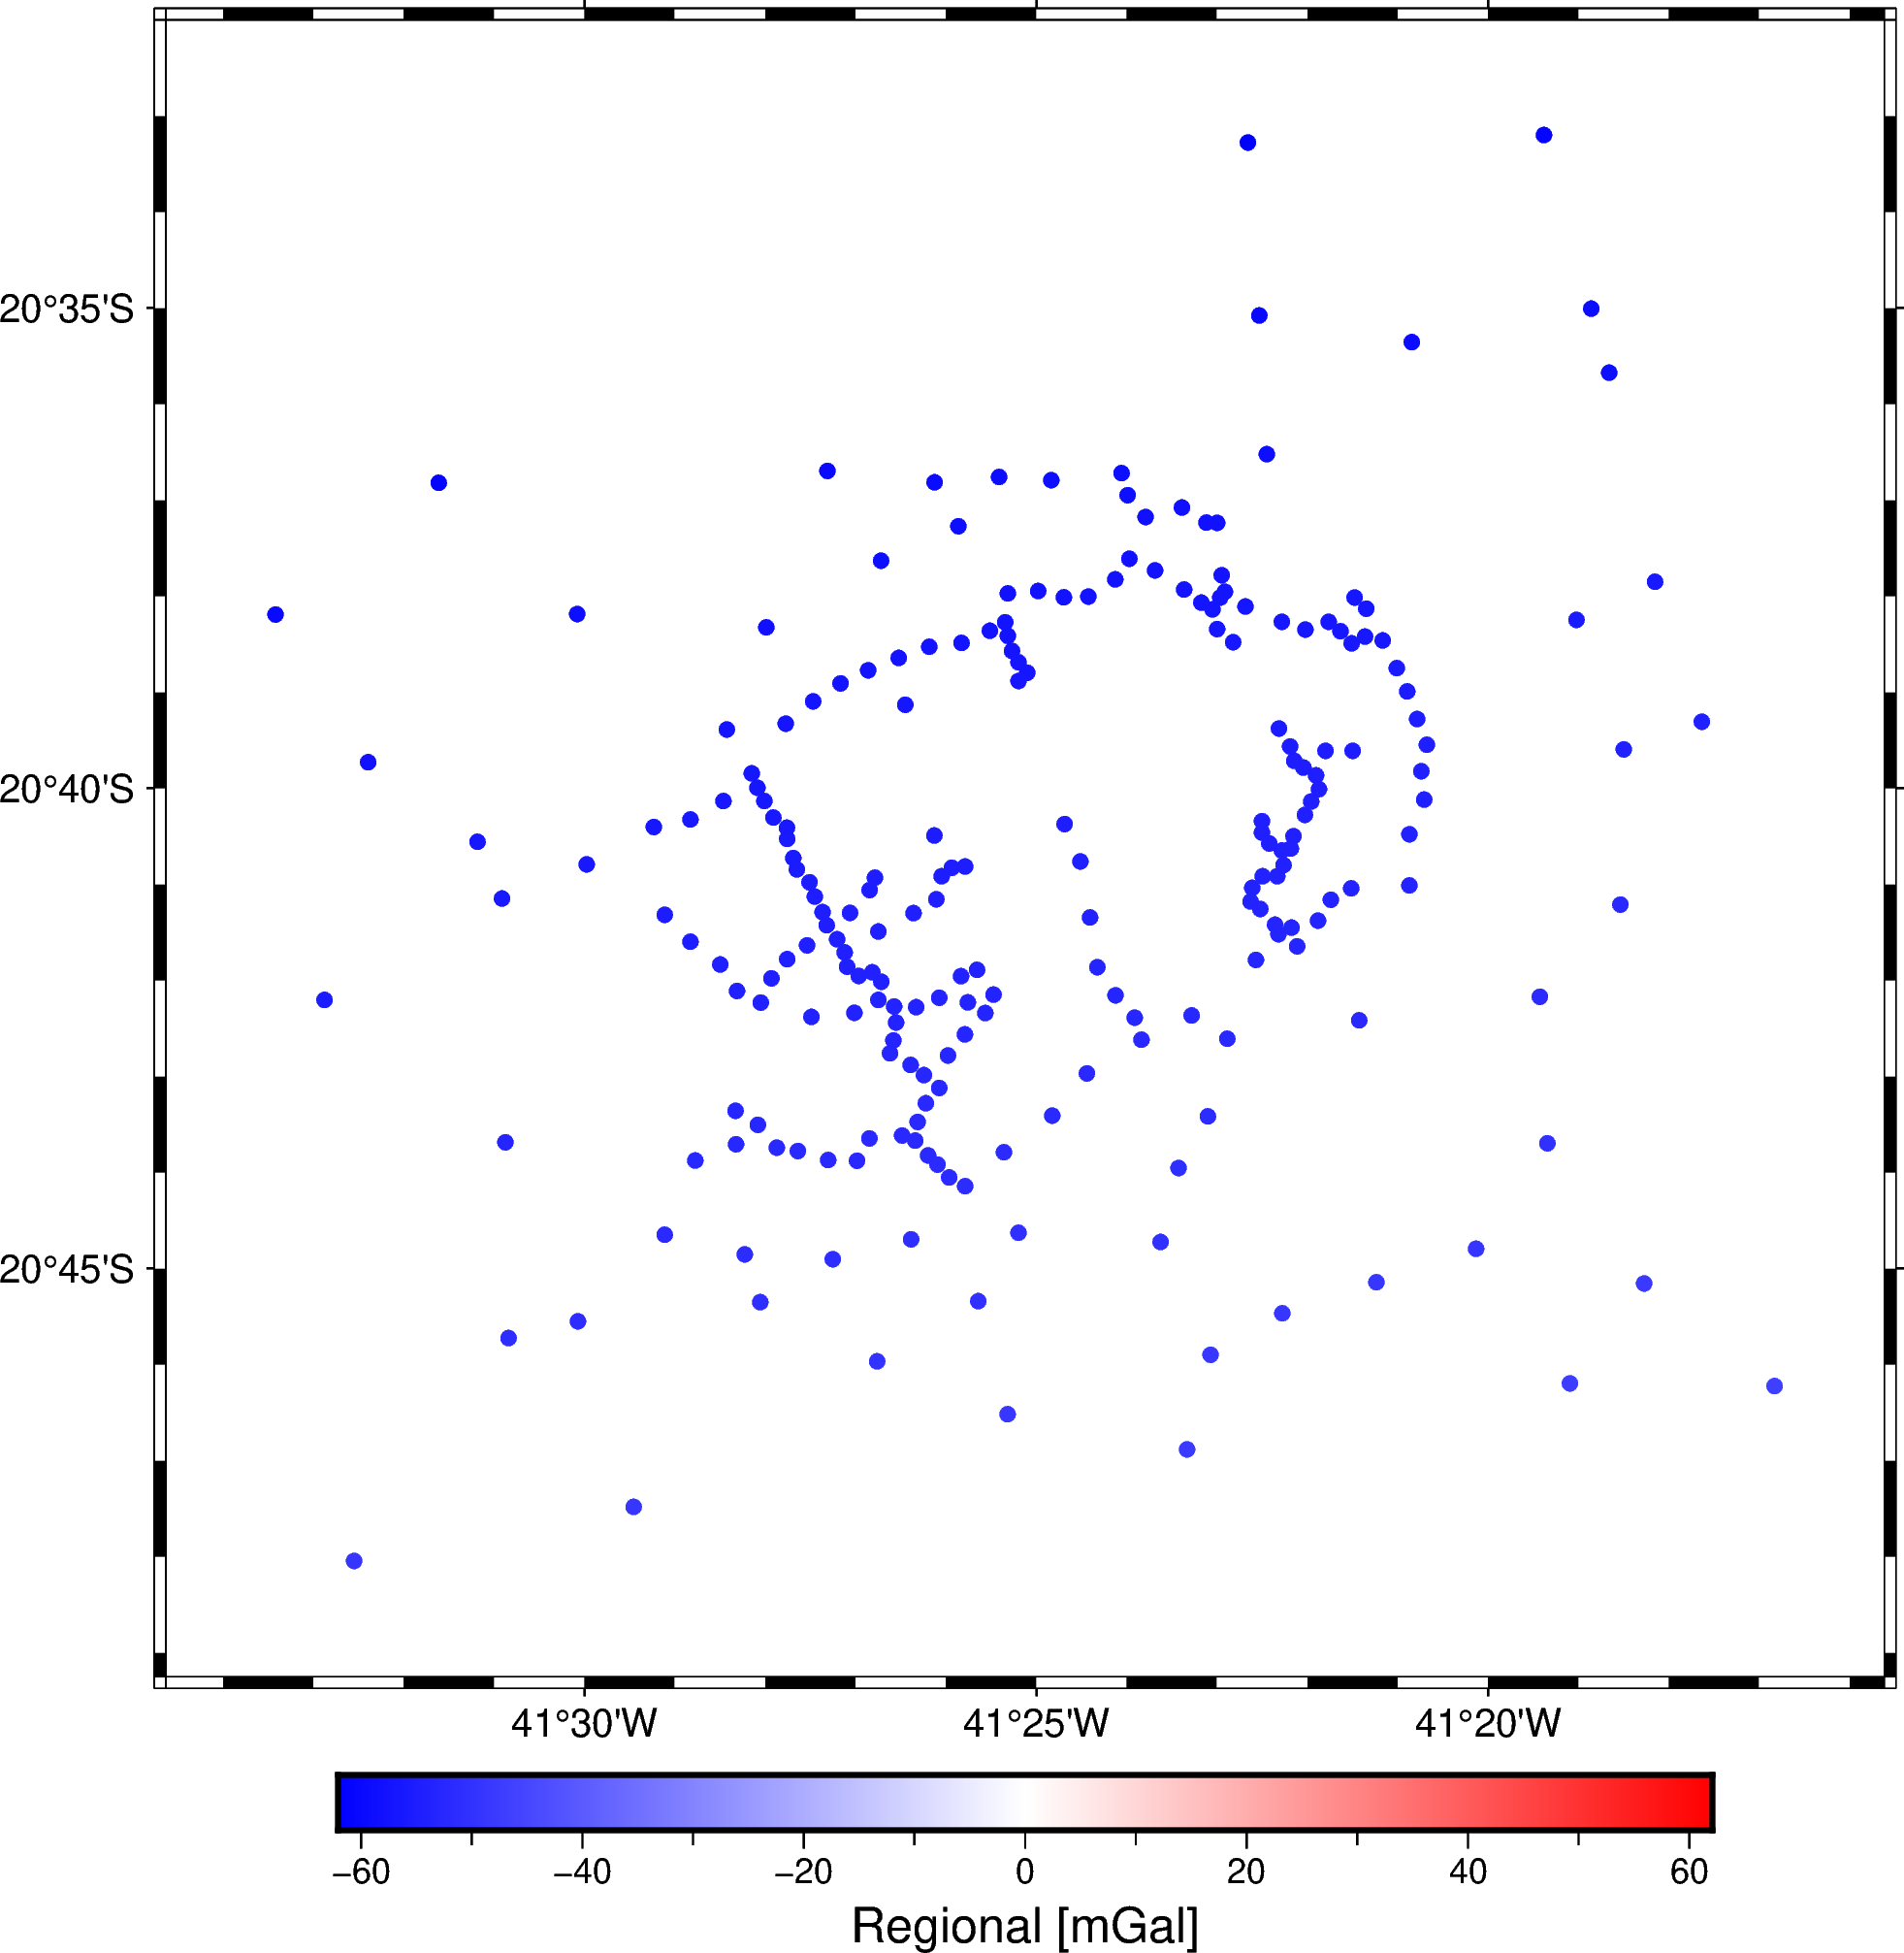

In [28]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.regional_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.regional_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Regional [mGal]"')
fig.show()

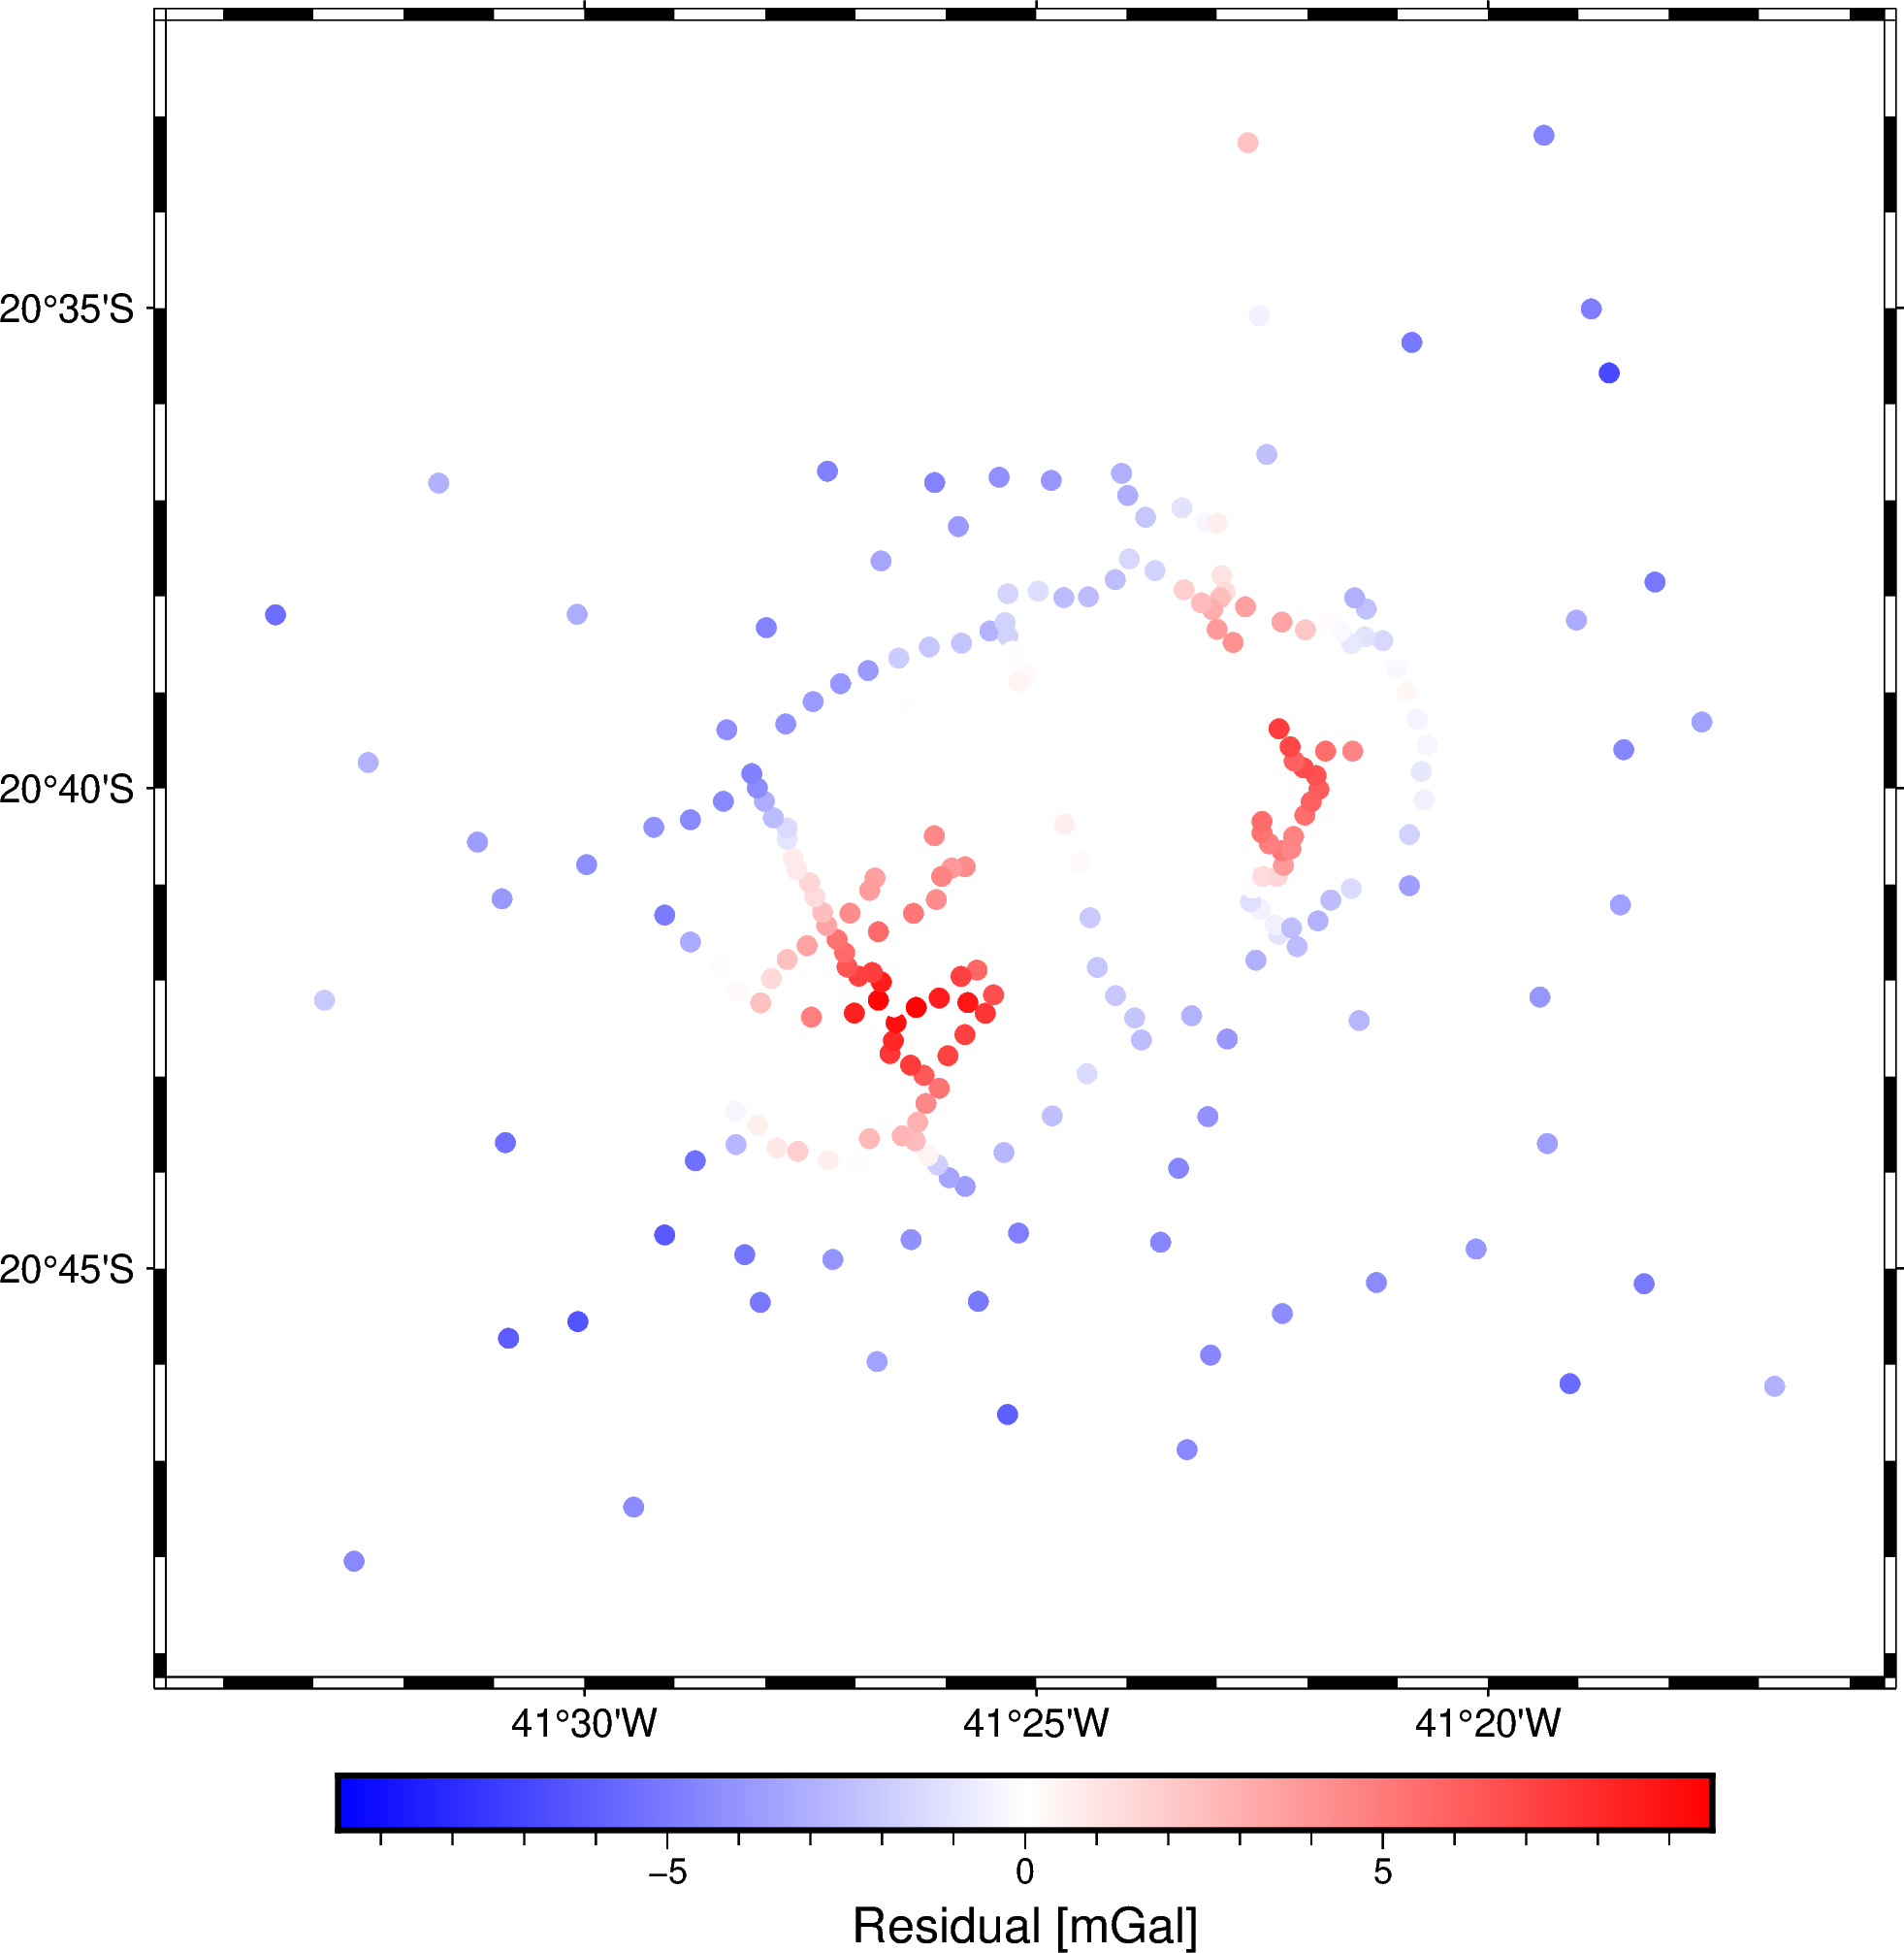

In [29]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.residual_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.residual_mgal,
    cmap=True,
    style="c5p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Residual [mGal]"')
fig.show()

## Interpolação com fontes equivalentes

In [30]:
eqs = hm.EquivalentSources(damping=1.0, depth=2e3)
eqs.fit((data.easting_m, data.northing_m, data.height_geometric_m), data.residual_mgal)

EquivalentSources(damping=1.0, depth=2000.0)

In [31]:
# Interpolar extra coord a partir da topografia
grid_extra_coord = vd.grid_coordinates(region, spacing= 2 / 3600)


interpolator = vd.KNeighbors()
topography_table = vd.grid_to_table(topography)
interpolator.fit((topography_table.longitude, topography_table.latitude), topography_table.elevation)
extra_coord=interpolator.predict((grid_extra_coord[0], grid_extra_coord[1]))

# geoid_values = np.reshape(geoid_1.elevation, topography.shape)
coordinates_grid = ([grid_extra_coord[0], grid_extra_coord[1], extra_coord])

In [32]:
residual_grid = eqs.grid(
    # coordinates=vd.grid_coordinates(region, spacing=2 / 3600, extra_coords=0.9e3),
    coordinates=coordinates_grid,
    data_names="gravity_residual",
    dims=("latitude", "longitude"),
    projection=projection,
)
residual_grid

<xarray.Dataset>
Dimensions:           (latitude: 447, longitude: 499)
Coordinates:
  * longitude         (longitude) float64 -41.56 -41.56 -41.56 ... -41.28 -41.28
  * latitude          (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55
    upward            (latitude, longitude) float32 384.0 377.0 ... 550.0 573.0
Data variables:
    gravity_residual  (latitude, longitude) float64 -3.782 -3.813 ... -2.984
Attributes:
    metadata:  Generated by EquivalentSources(damping=1.0, depth=2000.0)

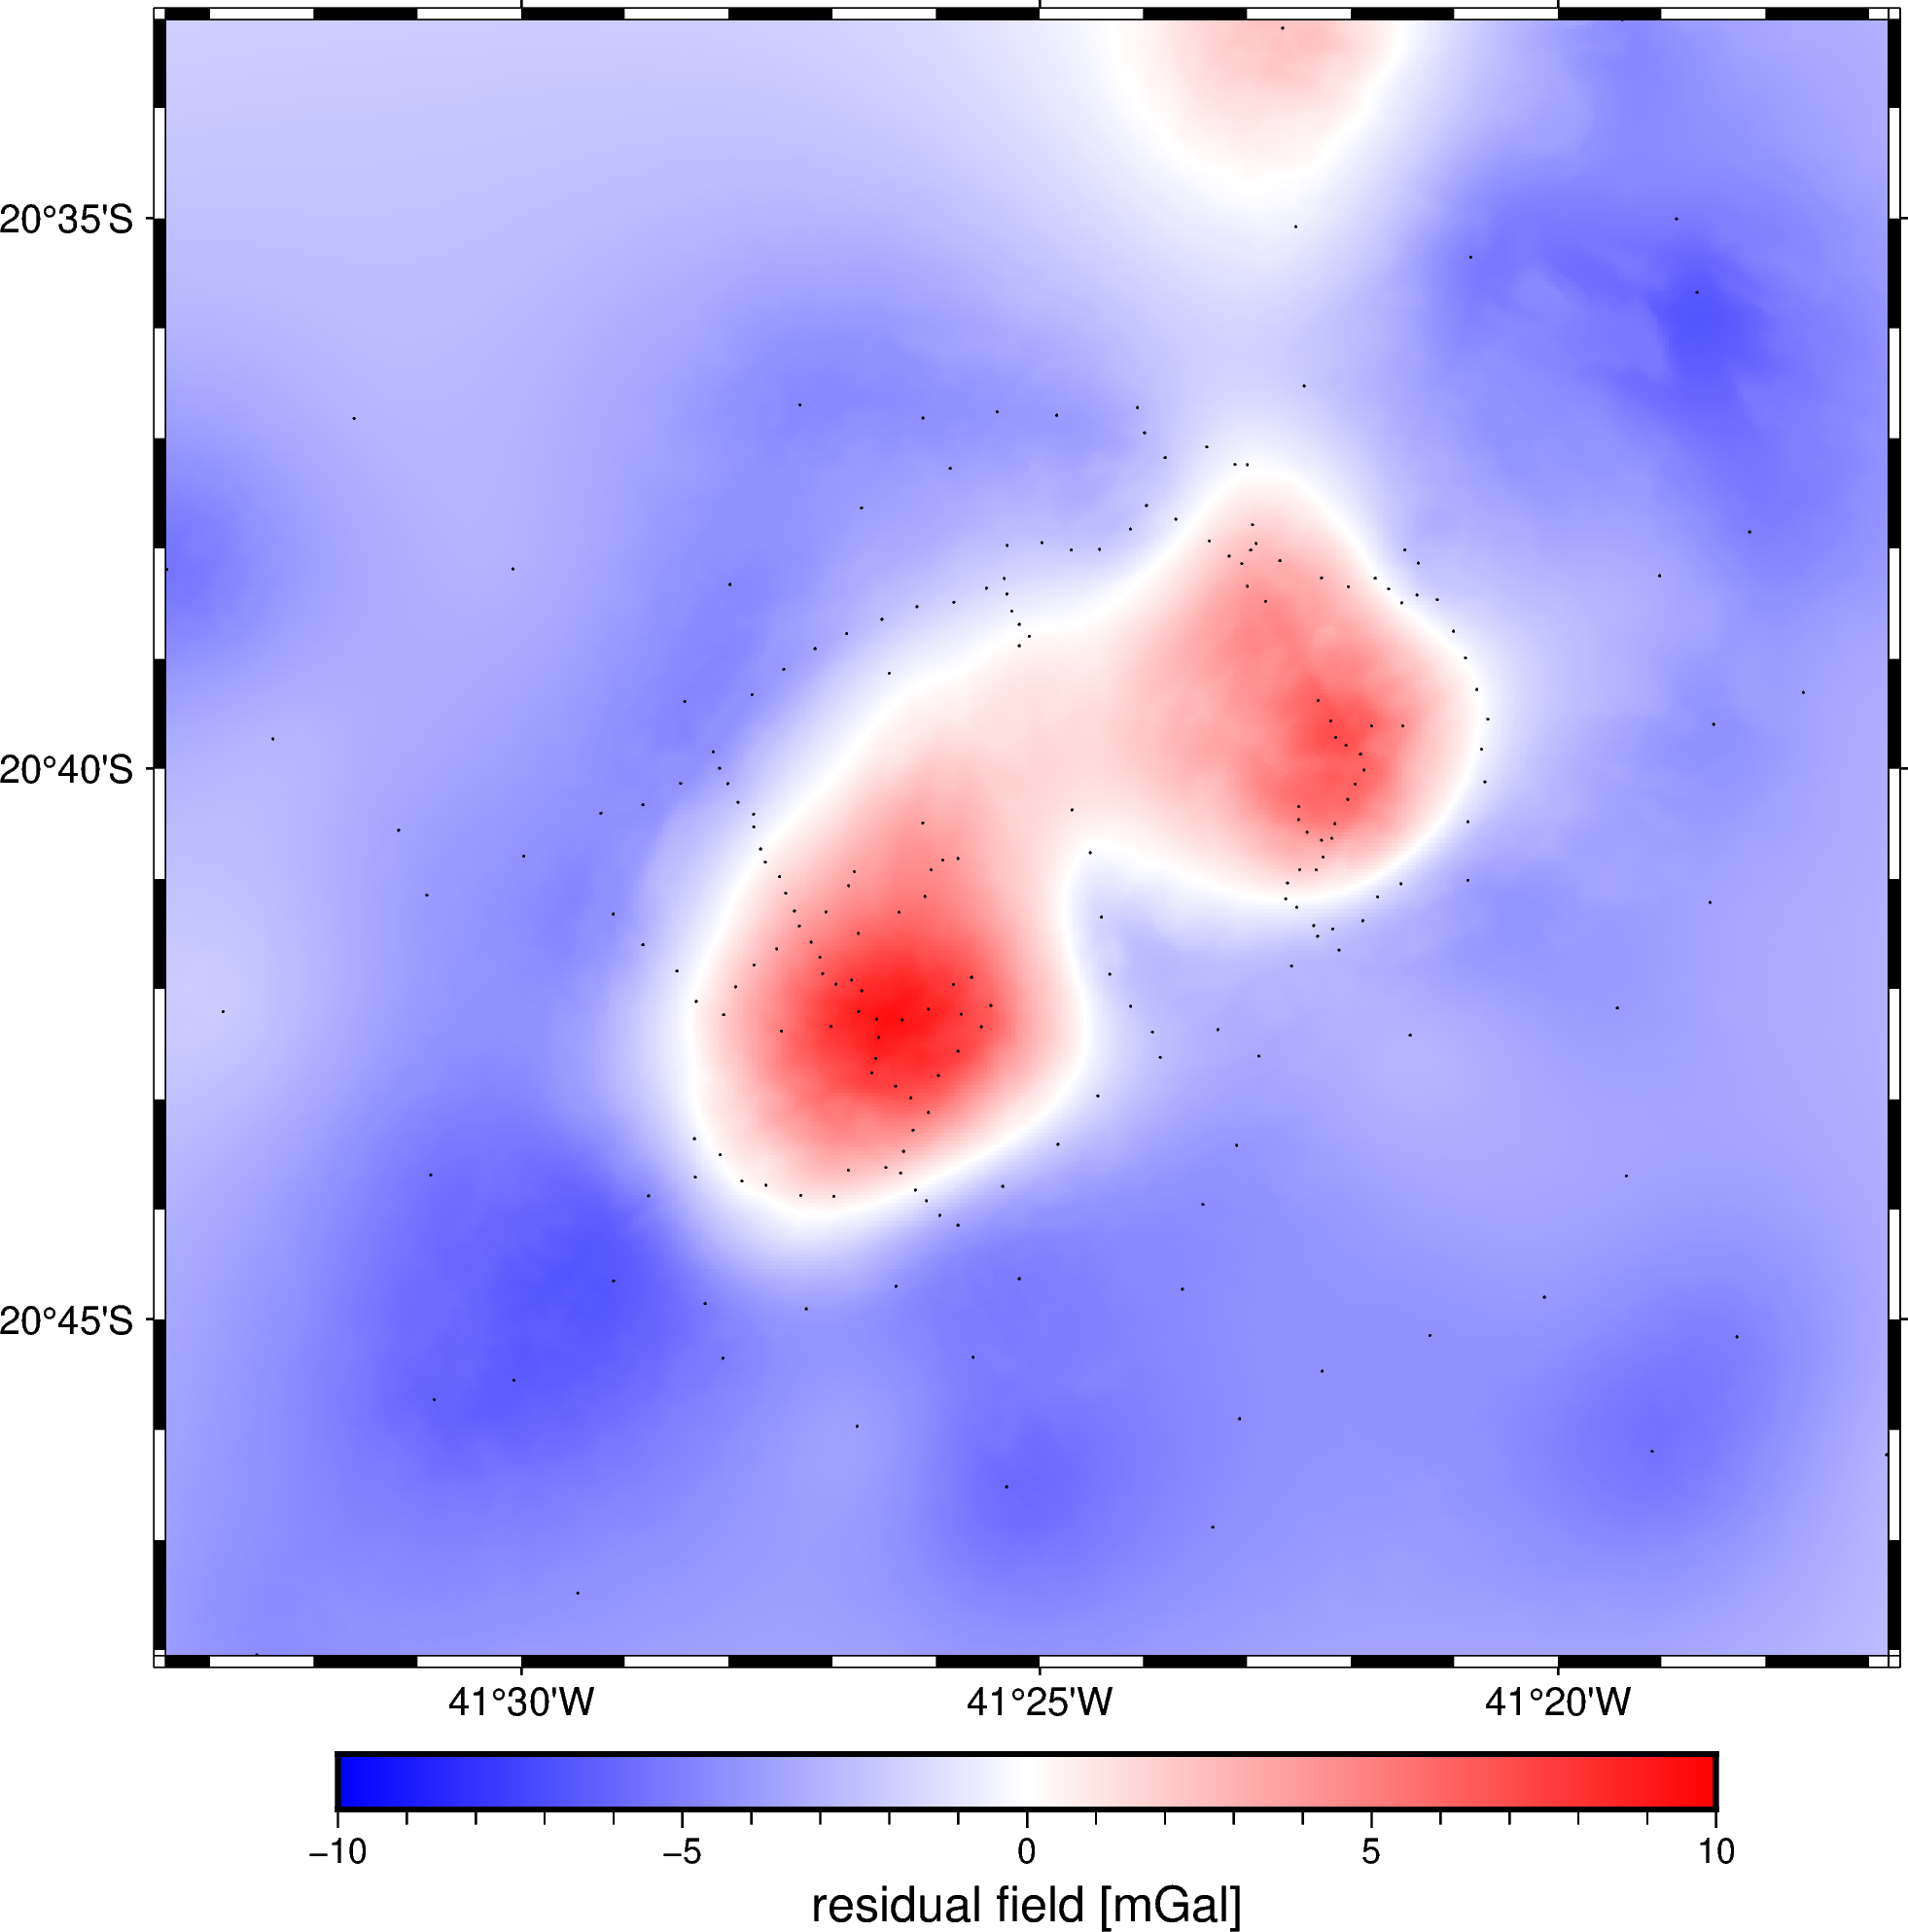

In [33]:
fig = pygmt.Figure()
scale = vd.maxabs(residual_grid.gravity_residual)
pygmt.makecpt(cmap="polar", series=[-10, 10], no_bg=True)
fig.grdimage(
    residual_grid.gravity_residual,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=region
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()

In [34]:
### Validação cruzada entre dados de grav residual e camada equivalente
r2_score = np.mean(
    vd.cross_val_score(
        eqs,
        coordinates,
        data.residual_mgal,
    )
)
print(f'O R² do modelo de camada equivalente para os dados é de: {r2_score:.3f}')

O R² do modelo de camada equivalente para os dados é de: 0.952


## image
<!-- ![](https://www.fatiando.org/tutorials/_images/bushveld_igneous_complex_geology.jpg) -->

# Calculate derivatives and total gradient

In [62]:
residual_grid = residual_grid.assign(derivative_easting=hm.derivative_easting(residual_grid.gravity_residual, order=2, method='finite-diff'))
residual_grid = residual_grid.assign(derivative_northing=hm.derivative_northing(residual_grid.gravity_residual, order=2, method='finite-diff'))
residual_grid = residual_grid.assign(derivative_upward=-(residual_grid.derivative_easting + residual_grid.derivative_northing))
residual_grid = residual_grid.assign(derivative_upward=hm.derivative_upward(residual_grid.gravity_residual, order=2))

residual_grid = residual_grid.assign(TG=np.sqrt(residual_grid.derivative_easting**2  +
                                                residual_grid.derivative_northing**2 +
                                                residual_grid.derivative_upward**2
                                               ))

In [63]:
residual_grid

<xarray.Dataset>
Dimensions:              (latitude: 447, longitude: 499)
Coordinates:
  * longitude            (longitude) float64 -41.56 -41.56 ... -41.28 -41.28
  * latitude             (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55
    upward               (latitude, longitude) float32 384.0 377.0 ... 573.0
Data variables:
    gravity_residual     (latitude, longitude) float64 -3.782 -3.813 ... -2.984
    derivative_easting   (latitude, longitude) float64 -6.551e+03 ... -4.448e+03
    derivative_northing  (latitude, longitude) float64 8.4e+03 ... 986.0
    derivative_upward    (latitude, longitude) float64 -1.583e+07 ... -7.398e+06
    TG                   (latitude, longitude) float64 1.583e+07 ... 7.398e+06
Attributes:
    metadata:  Generated by EquivalentSources(damping=1.0, depth=2000.0)

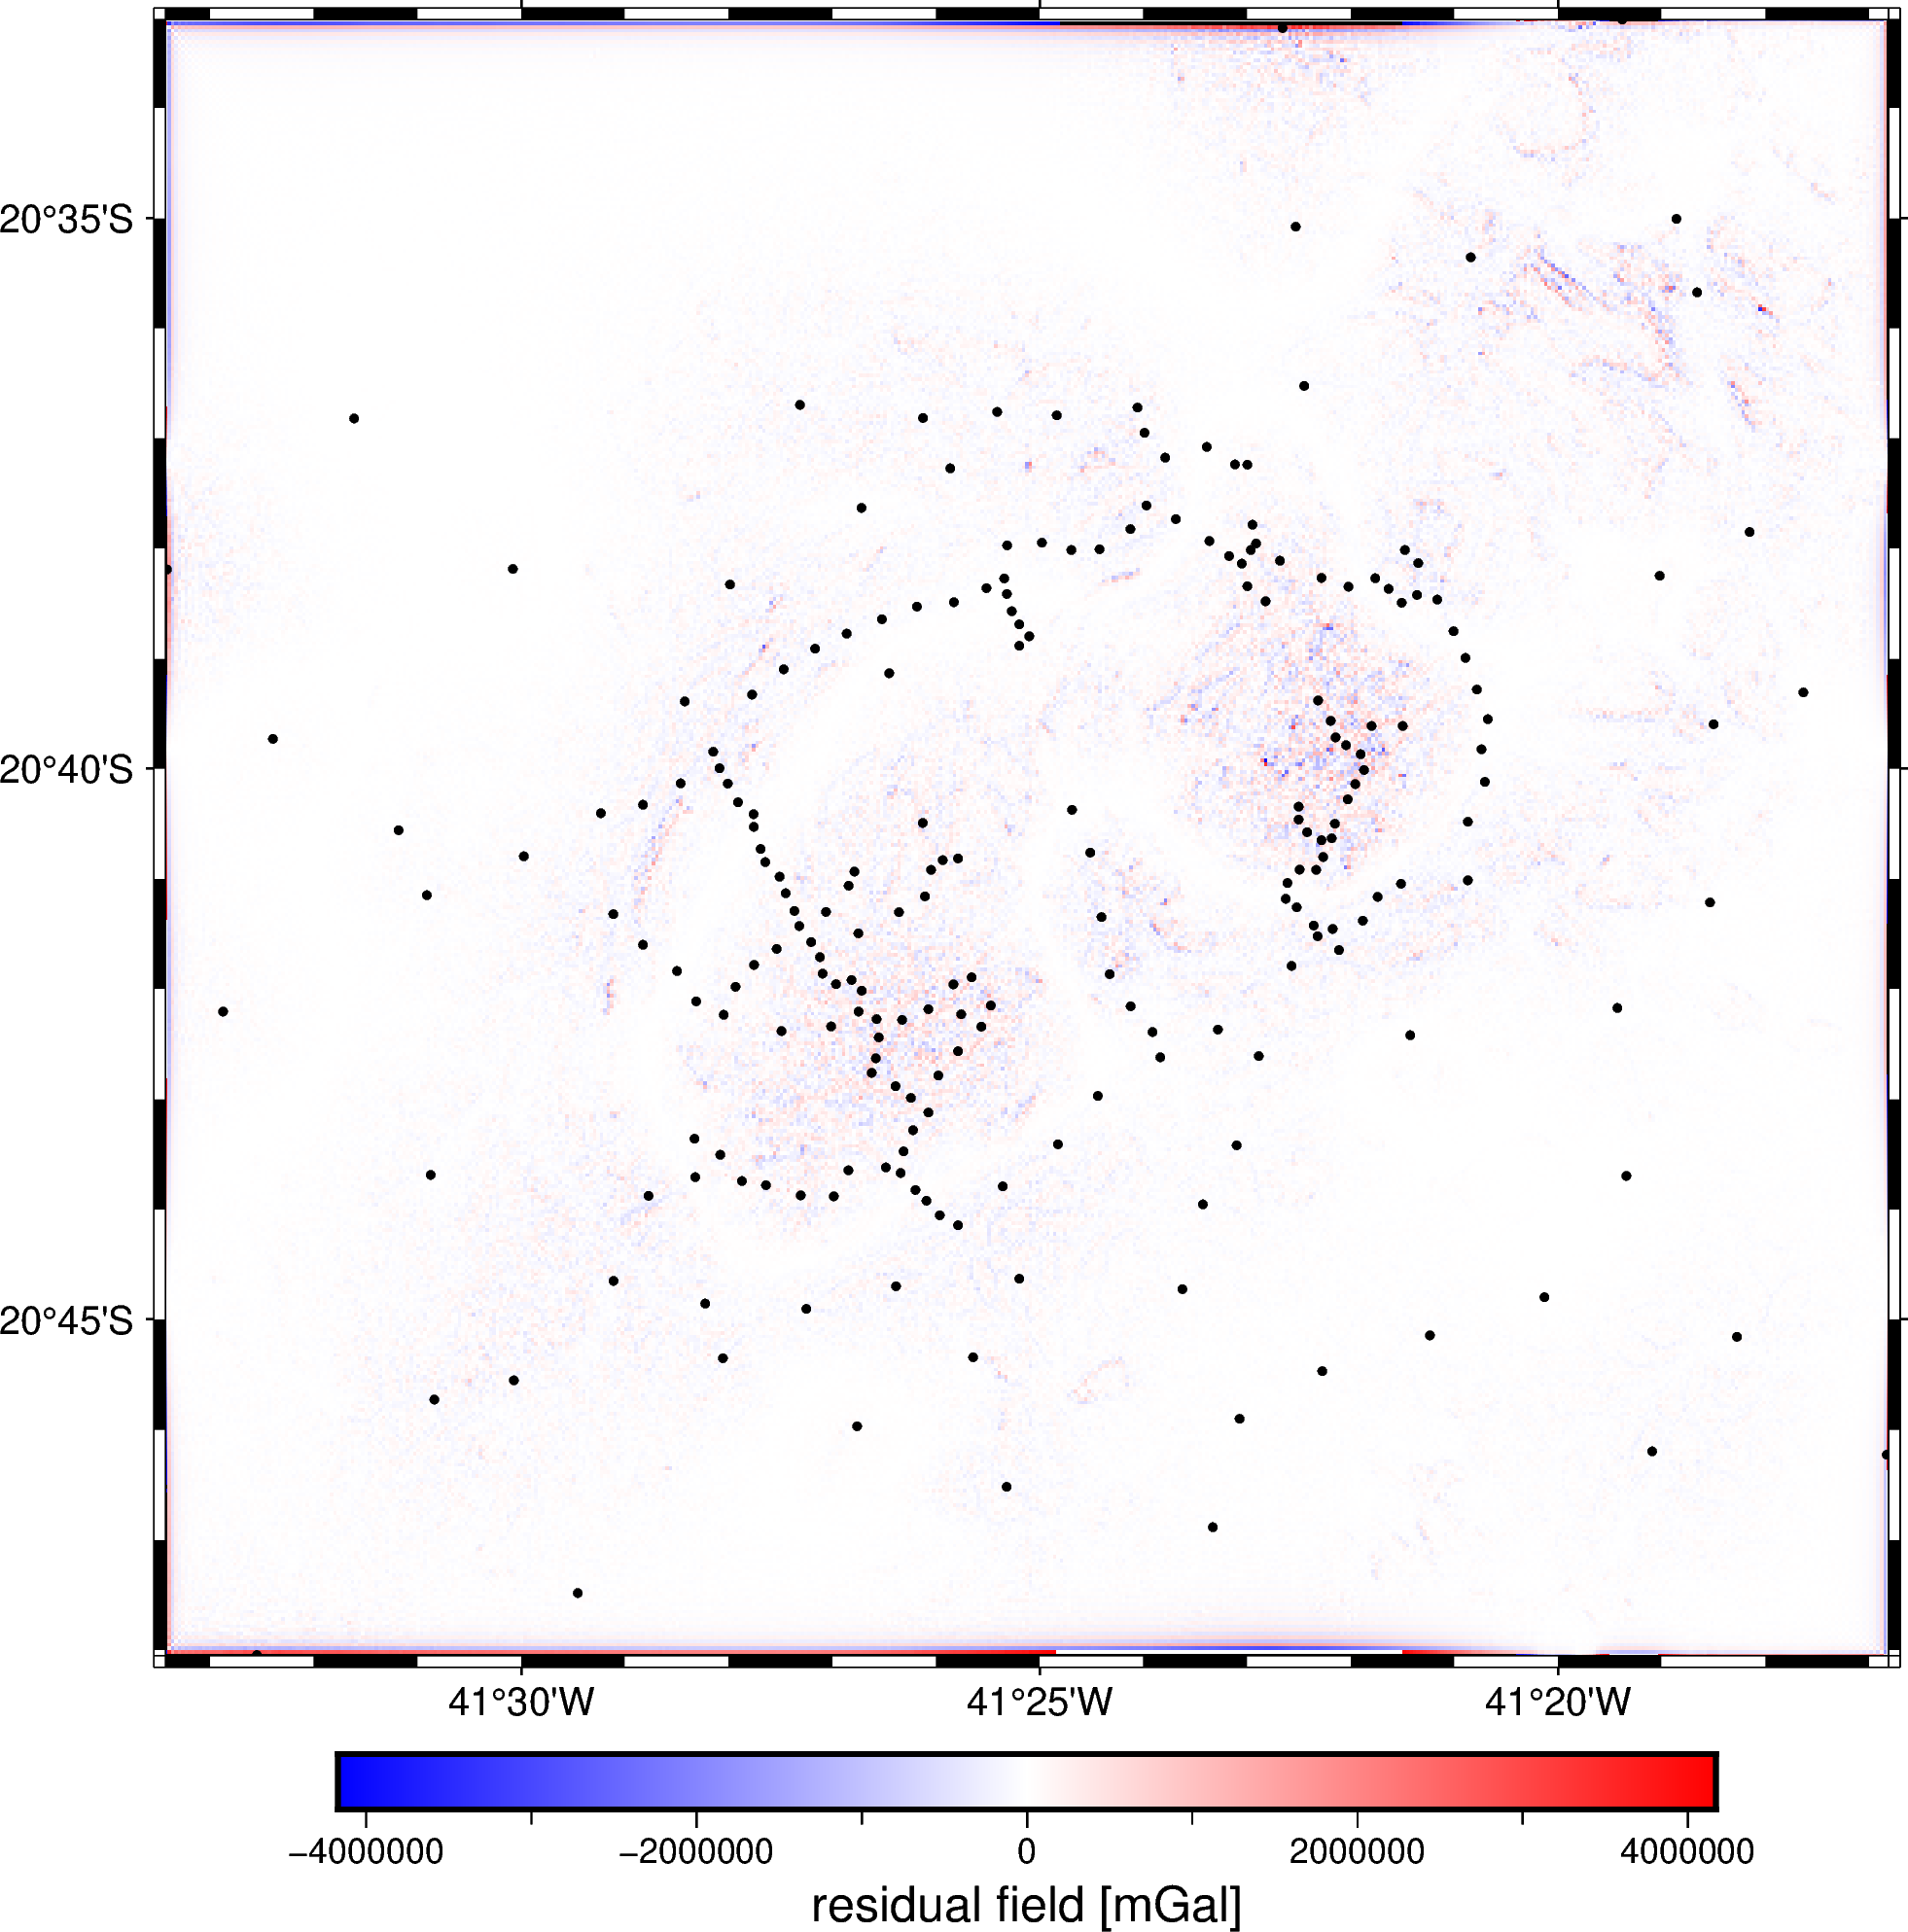

In [65]:
fig = pygmt.Figure()
scale = vd.maxabs(residual_grid.derivative_upward)
pygmt.makecpt(cmap="polar", series=[-scale/8, scale/8], no_bg=True)
fig.grdimage(
    residual_grid.derivative_upward,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=region
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.08c",
    color="black",
)
fig.show()

In [38]:
def matriz_sensibilidade(x_i, y_i, z_i, x_j, y_j, z_j):
    gamma = 6.67e-11 # constante de gravitação universal, mudei o nome para não confundir com a matriz G
    cte   = 2*np.pi*gamma *10**5 # convertitido para mGal
    G = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    Gz = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    
    
    for j in range(len(x_j)):
        for i in range(len(x_i)):
            
            delta_x = x_i[i] - x_j[j]
            delta_y = y_i[i] - y_j[j]
            delta_z = z_i[i] - z_j[j]
            r2 = delta_x**2 + delta_y**2 + delta_z**2

            # cada ponto obs tem q considerar o efeito de cada túnel
            gz_i_j = cte*(delta_z/r2)
            gzz_i_j = cte*(1/r2-2*delta_z/r2**2) 
            
            G[i,j]  = gz_i_j  
            Gz[i,j] = gzz_i_j
            
    return G, Gz
    
    


def eq_la_bzz(data, grid, extra_coord=0):
    x_i, y_i, z_i = data.easting_m.values, data.northing_m.values, data.height_geometric_m.values
    # x_j, y_j = grid[0].ravel(), grid[1].ravel()
    # z_j = x_j*0 + extra_coord

    x_j, y_j, z_j = data.easting_m.values, data.northing_m.values, data.height_geometric_m.values*0+extra_coord

    G, Gz = matriz_sensibilidade(x_i, y_i, z_i, x_j, y_j, z_j)
    
    Gz_transpose = Gz.T
    m = (np.linalg.inv(Gz_transpose@Gz))@(Gz_transpose@data.gravity_bouguer_mgal)

    predicted_high_freq = G@m

    return predicted_high_freq


In [39]:
easting_grid, northing_grid = projection(coordinates_grid[0], coordinates_grid[1])
grid = [easting_grid, northing_grid]
teste = eq_la_bzz(data, grid, extra_coord=1000)

In [40]:
teste

array([49093.86363977, 49129.07205281, 51555.19818706, 48883.82913216,
       46616.21359121, 49456.04790672, 47232.78475252, 49436.77384697,
       49449.39818998, 45644.64130937, 42098.11473189, 39018.80282061,
       38431.103082  , 37527.11868227, 36808.71552761, 34933.23650986,
       32970.28089971, 31131.96639842, 31528.91114881, 30652.89110263,
       30451.23241156, 30716.80501612, 29921.56721105, 30155.14889249,
       29946.4057845 , 29408.02020002, 29909.6673571 , 30102.00162958,
       30819.21802968, 30189.16128943, 28651.84441168, 27097.45262481,
       26640.34646539, 25835.99714624, 26584.4122103 , 28697.60247396,
       32155.88289987, 35373.17467081, 39553.79178607, 43261.46413703,
       39859.31516948, 47355.71388675, 47659.61675408, 48510.77619766,
       47142.58001758, 48799.97116753, 49338.43772511, 43100.55281904,
       39683.63420278, 36698.5923797 , 34675.23942943, 31116.49957691,
       27957.74323593, 25933.00156546, 23885.89396742, 21973.10560354,
      

In [41]:
eqs_regional = hm.EquivalentSources(damping=1.0e-1, depth=3e3)
eqs_regional.fit((data.easting_m, data.northing_m, data.height_geometric_m), data.gravity_bouguer_mgal)
regional_grid = eqs_regional.grid(
    coordinates=vd.grid_coordinates(region, spacing=2 / 3600, extra_coords=0.9e3),
    # coordinates=coordinates_grid,
    data_names="gravity_bouguer",
    dims=("latitude", "longitude"),
    projection=projection,
)
regional_grid

<xarray.Dataset>
Dimensions:          (latitude: 447, longitude: 499)
Coordinates:
  * longitude        (longitude) float64 -41.56 -41.56 -41.56 ... -41.28 -41.28
  * latitude         (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55
    upward           (latitude, longitude) float64 900.0 900.0 ... 900.0 900.0
Data variables:
    gravity_bouguer  (latitude, longitude) float64 -46.96 -47.11 ... -47.1
Attributes:
    metadata:  Generated by EquivalentSources(damping=0.1, depth=3000.0)

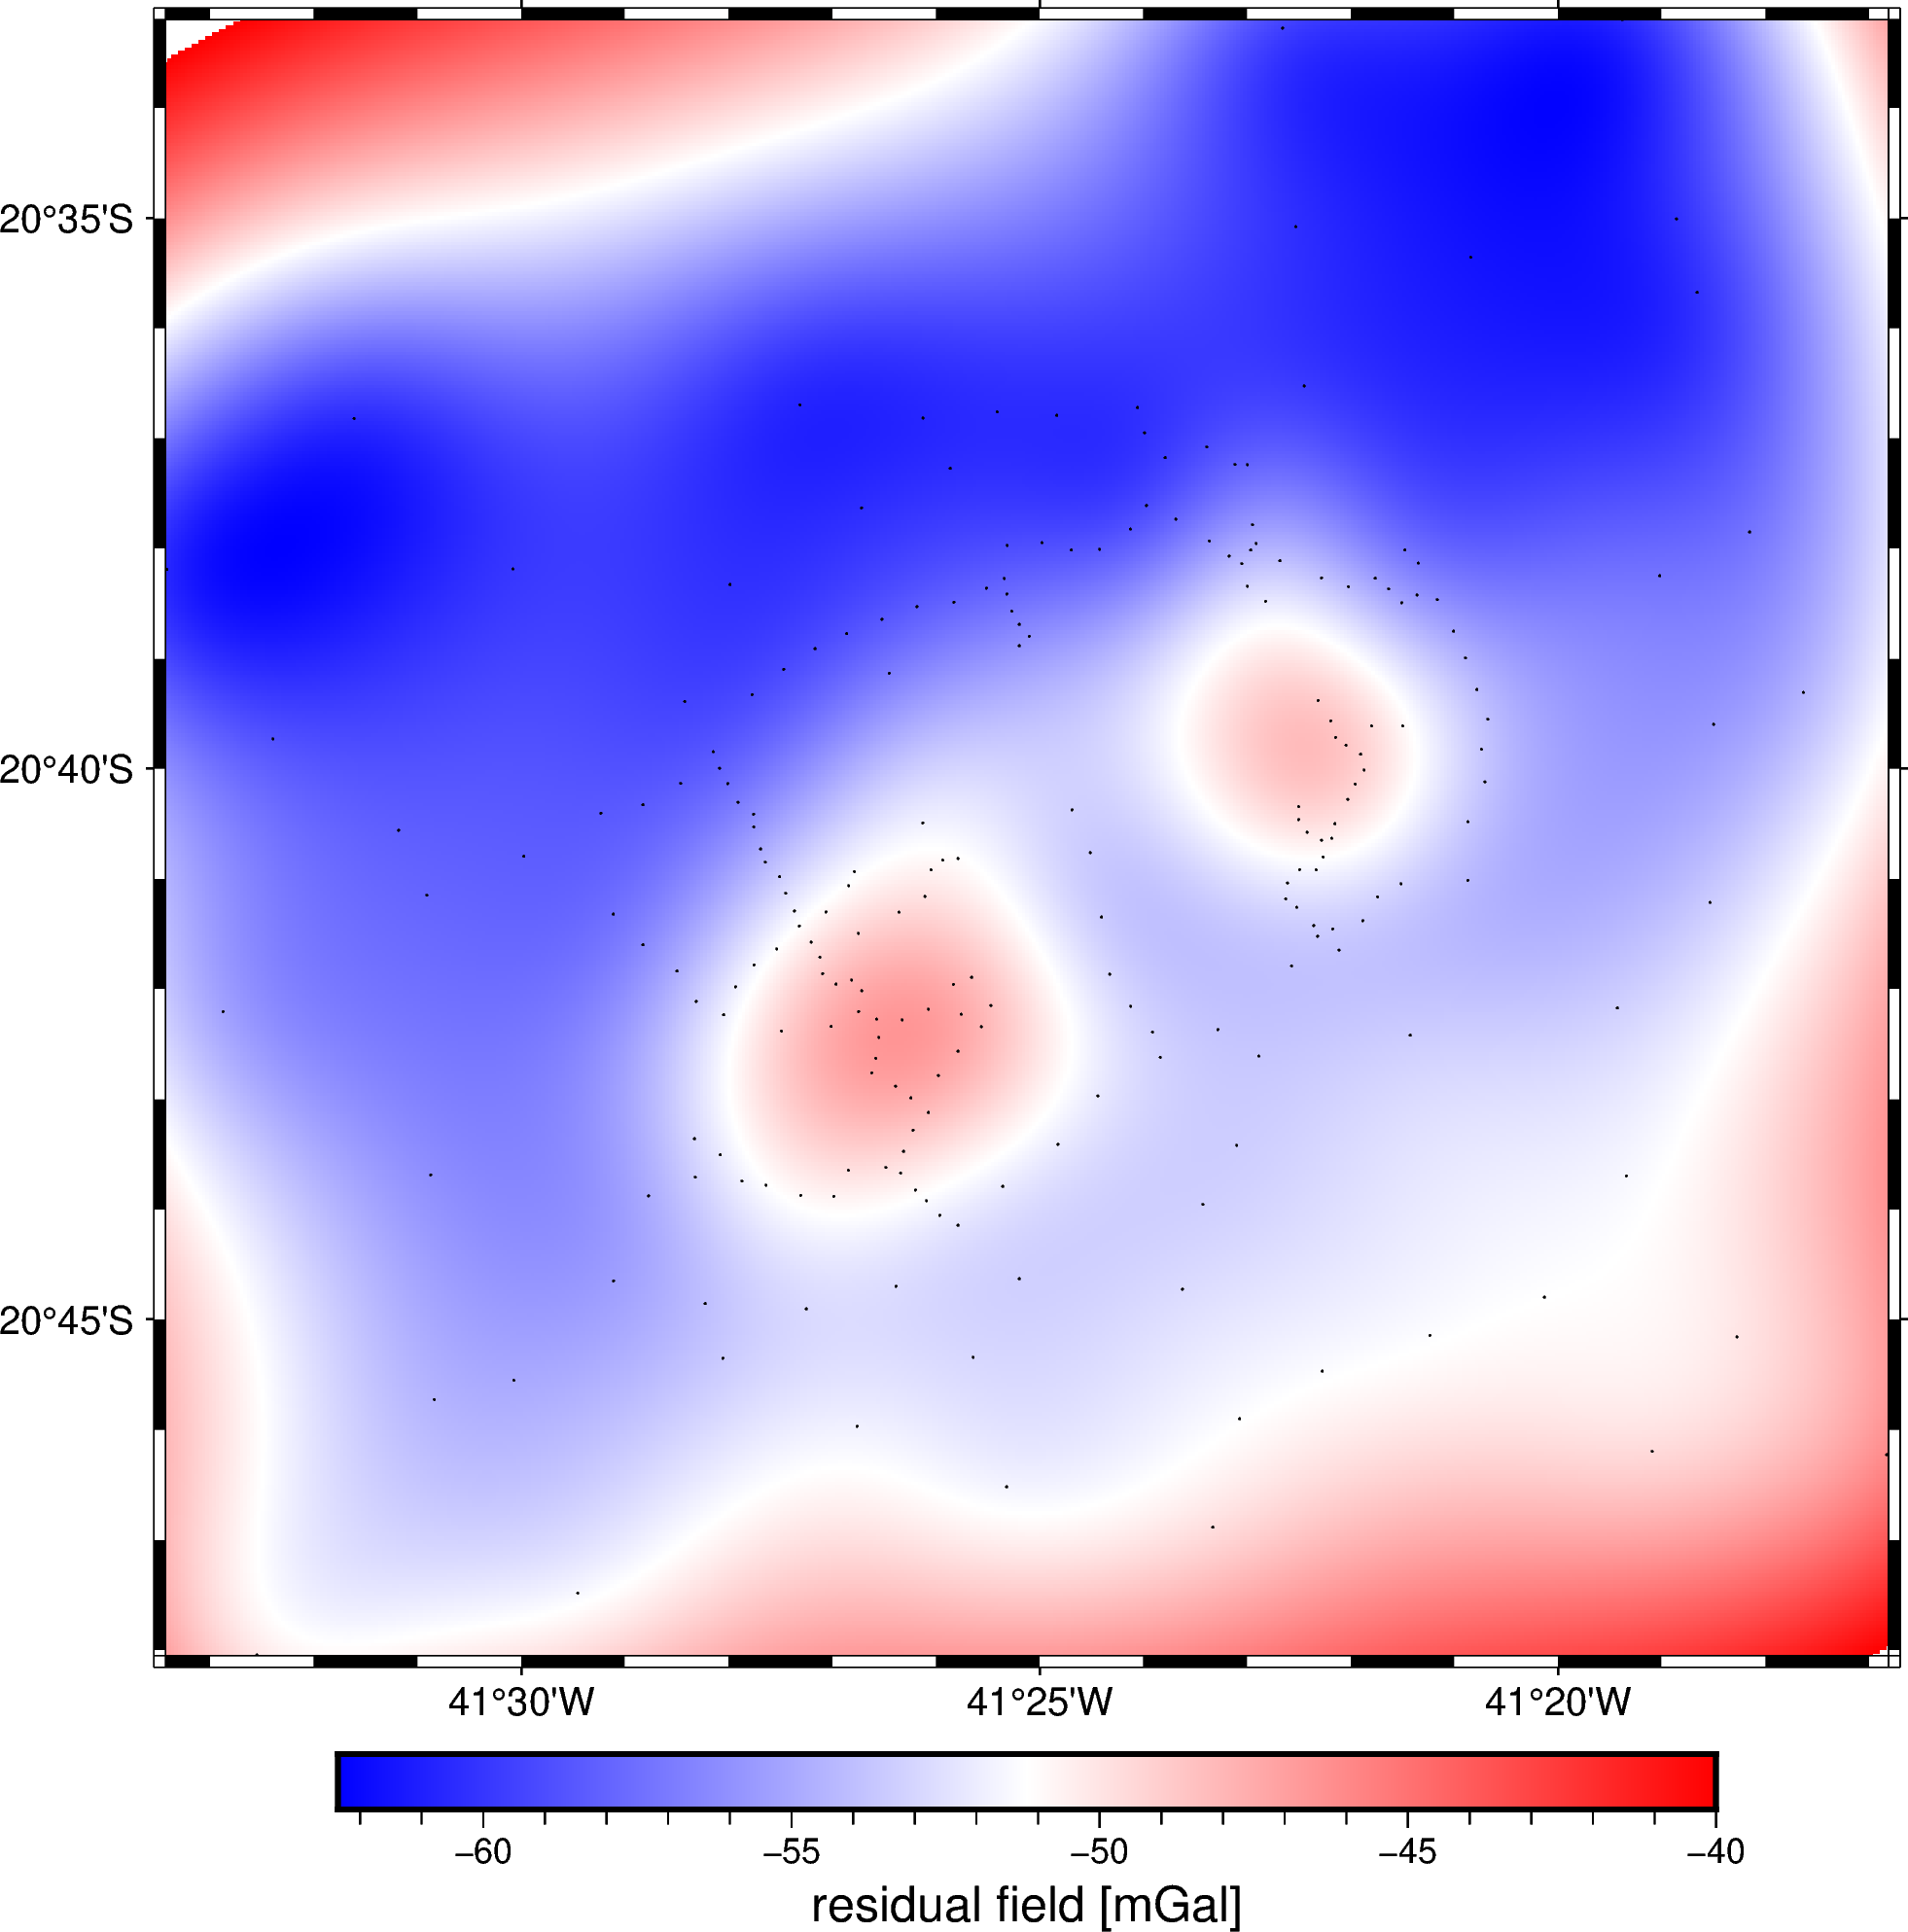

In [42]:
fig = pygmt.Figure()
scale = vd.maxabs(regional_grid.gravity_bouguer)
pygmt.makecpt(cmap="polar", series=[-scale, -40], no_bg=True)
fig.grdimage(
    regional_grid.gravity_bouguer,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=region
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()

In [43]:
### Validação cruzada entre dados de grav residual e camada equivalente
r2_score = np.mean(
    vd.cross_val_score(
        eqs_regional,
        coordinates,
        data.gravity_bouguer_mgal,
    )
)
print(f'O R² do modelo de camada equivalente para os dados é de: {r2_score:.3f}')

O R² do modelo de camada equivalente para os dados é de: 0.800


In [44]:
regional_grid = regional_grid.assign(derivative_easting=hm.derivative_easting(regional_grid.gravity_bouguer, order=1, method='finite-diff'))
regional_grid = regional_grid.assign(derivative_northing=hm.derivative_northing(regional_grid.gravity_bouguer, order=1, method='finite-diff'))
regional_grid = regional_grid.assign(derivative_upward=hm.derivative_upward(regional_grid.gravity_bouguer, order=1))

regional_grid = regional_grid.assign(TG=np.sqrt(regional_grid.derivative_easting**2  +
                                                regional_grid.derivative_northing**2 +
                                                regional_grid.derivative_northing**2
                                               ))

regional_grid

<xarray.Dataset>
Dimensions:              (latitude: 447, longitude: 499)
Coordinates:
  * longitude            (longitude) float64 -41.56 -41.56 ... -41.28 -41.28
  * latitude             (latitude) float64 -20.8 -20.8 -20.8 ... -20.55 -20.55
    upward               (latitude, longitude) float64 900.0 900.0 ... 900.0
Data variables:
    gravity_bouguer      (latitude, longitude) float64 -46.96 -47.11 ... -47.1
    derivative_easting   (latitude, longitude) float64 -267.2 -265.8 ... 321.3
    derivative_northing  (latitude, longitude) float64 -137.7 -138.4 ... 158.3
    derivative_upward    (latitude, longitude) float64 -1.554e+04 ... -1.588e+04
    TG                   (latitude, longitude) float64 330.6 330.1 ... 391.6
Attributes:
    metadata:  Generated by EquivalentSources(damping=0.1, depth=3000.0)

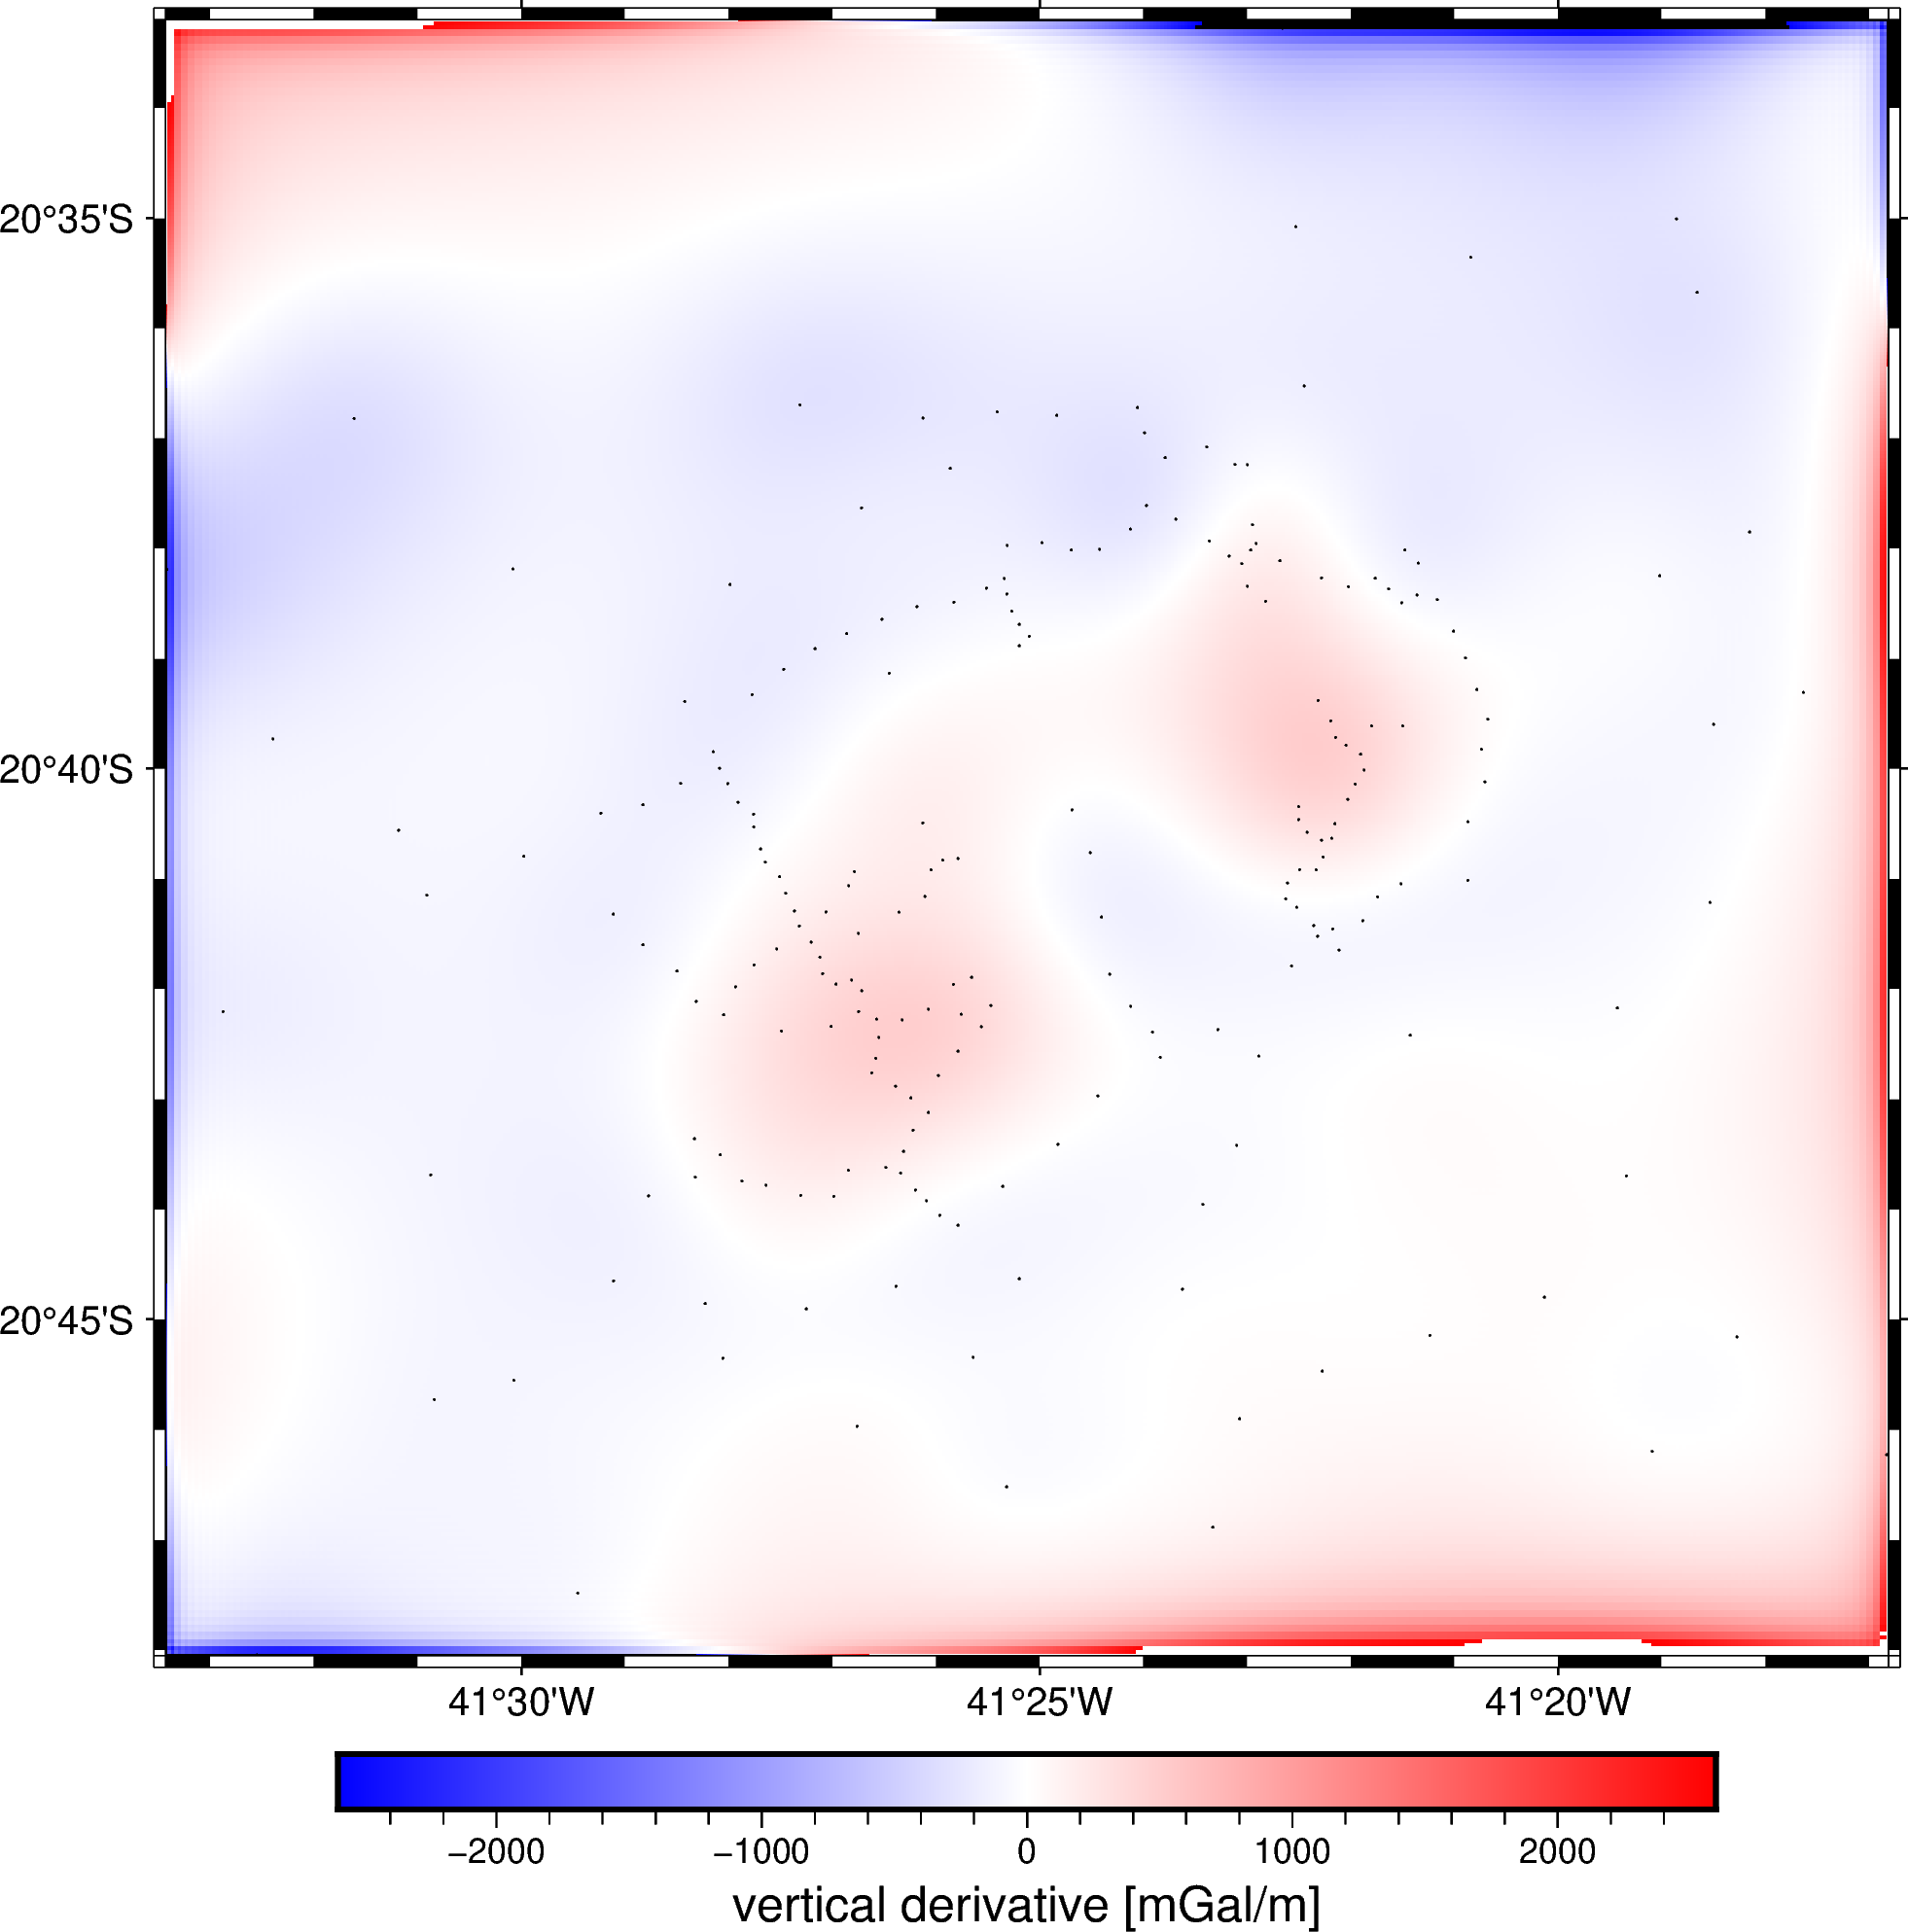

In [45]:
fig = pygmt.Figure()
scale = vd.maxabs(regional_grid.derivative_upward)
pygmt.makecpt(cmap="polar", series=[-scale/10, scale/10], no_bg=True)
fig.grdimage(
    regional_grid.derivative_upward,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=region
)
fig.colorbar(frame='af+l"vertical derivative [mGal/m]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()

In [46]:
regional_table = vd.grid_to_table(regional_grid)
interpolator = vd.KNeighbors()
interpolator.fit((regional_table.longitude, regional_table.latitude), regional_table.derivative_upward)
data = data.assign(bouguer_derivative_upward=interpolator.predict((data.longitude, data.latitude)))

interpolator.fit((regional_table.longitude, regional_table.latitude), regional_table.derivative_easting)
data = data.assign(bouguer_derivative_easting=interpolator.predict((data.longitude, data.latitude)))

interpolator.fit((regional_table.longitude, regional_table.latitude), regional_table.derivative_northing)
data = data.assign(bouguer_derivative_northing=interpolator.predict((data.longitude, data.latitude)))

data

Station     Reading      Time        Date  height_sea_level_m  \
0          1     2239.39  14:28:00  2019/12/03              147.94   
1          2     2239.41  15:12:00  2019/12/03              152.06   
2          3     2246.38  16:06:00  2019/12/03              117.30   
3          4     2245.71  16:46:00  2019/12/03              129.10   
4          5     2249.62  17:13:00  2019/12/03              130.01   
..       ...         ...       ...         ...                 ...   
222      223  2203015.00  17:06:00  2019/12/16              264.94   
223      224  2168435.00  09:38:00  2019/12/17              204.11   
224      225     2164.15  11:52:00  2019/12/17              226.73   
225      226  2135695.00  15:49:00  2019/12/17              443.57   
226      227     2165.48  16:38:00  2019/12/17              293.06   

                 X             Y  longitude   latitude   gravity_mgal  ...  \
0    238246.104213  7.702141e+06 -41.514018 -20.762135  978591.406605  ...   
1    239573.565307  7.702483e+06 -41.501226 -20.759230  978591.445776  ...   
2    241216.748955  7.704176e+06 -41.485206 -20.744179  978598.473518  ...   
3    243071.287960  7.702906e+06 -41.467595 -20.755897  978597.809879  ...   
4    245332.547009  7.701803e+06 -41.446052 -20.766168  978601.745635  ...   
..             ...           ...        ...        ...            ...  ...   
222  245174.133206  7.717189e+06 -41.445344 -20.627243  978555.178643  ...   
223  239604.189758  7.711266e+06 -41.499631 -20.679943  978573.732084  ...   
224  237502.245723  7.711667e+06 -41.519734 -20.676036  978569.446411  ...   
225  240697.890125  7.698939e+06 -41.490961 -20.791377  978540.768876  ...   
226  235344.656608  7.697817e+06 -41.542518 -20.800757  978570.866953  ...   

     normal_gravity_mgal gravity_disturbance_mgal      easting_m  \
0          978637.755893               -46.349288  238246.104213   
1          978636.310346               -44.864570  239573.565308   
2          978646.141191               -47.667672  241216.748956   
3          978643.198869               -45.388990  243071.287960   
4          978643.532181               -41.786546  245332.547009   
..                   ...                      ...            ...   
222        978593.592668               -38.414026  245174.133206   
223        978615.508625               -41.776541  239604.189759   
224        978608.293091               -38.846680  237502.245723   
225        978548.250028                -7.481152  240697.890126   
226        978595.269947               -24.402994  235344.656609   

       northing_m  gravity_bouguer_mgal  regional_mgal  residual_mgal  \
0    7.702141e+06            -57.329386     -51.183233      -6.146153   
1    7.702483e+06            -57.635391     -51.149240      -6.486151   
2    7.704176e+06            -58.102189     -51.835811      -6.266378   
3    7.702906e+06            -55.828249     -50.784632      -5.043617   
4    7.701803e+06            -53.301499     -49.758250      -3.543249   
..            ...                   ...            ...            ...   
222  7.717189e+06            -61.985274     -58.621371      -3.363903   
223  7.711266e+06            -60.396328     -56.187897      -4.208431   
224  7.711667e+06            -60.471629     -56.782842      -3.688787   
225  7.698939e+06            -53.266179     -48.918974      -4.347205   
226  7.697817e+06            -53.688272     -49.204177      -4.484095   

     bouguer_derivative_upward  bouguer_derivative_easting  \
0                  -100.987105                  -51.329547   
1                  -100.722404                    2.266130   
2                  -134.835309                   65.504926   
3                   -51.088899                   74.653390   
4                    32.136256                   -5.209747   
..                         ...                         ...   
222                -192.546256                   34.850322   
223                -107.409197       

# Calculate equivalente layer for bzz

\begin{equation}
g_{zz}(x_i, yi, z_i) = 2 \pi G \Delta \theta \left ( \dfrac{1}{\left(z_\text{i}-z_0\right)^2+\left(y_\text{i}-y_0\right)^2+\left(x_\text{i}-x_0\right)^2}-\dfrac{2\left(z_\text{i}-z_0\right)^2}{\left(\left(z_\text{i}-z_0\right)^2+\left(y_\text{i}-y_0\right)^2+\left(x_\text{i}-x_0\right)^2\right)^2} \right )
\end{equation}
    
onde:     
$\Delta \theta$ = massa pontual $(\Delta \rho R^3 )$, sendo a multiplicação entre contraste de densidade entre o corpo e a sua encaixante ($\Delta \rho$, em $kg~m^{-3}$) pelo é raio do corpo ao cubo ($R^3$, em $m^3$); \
$G = 6.67x10^{-11}$ é constante da gravitação universal (em $m^3~kg^{-1}~s^{-2}$); \
$(x_j, y_j, z_j)$ posição da fonte de massa pontual (em $m$); \
$(x_i, y_i, z_i)$ posição de observação (em $m$);

In [47]:
def matriz_sensibilidade(x_i, y_i, z_i, x_j, y_j, z_j):
    gamma = 6.67e-11 # constante de gravitação universal, mudei o nome para não confundir com a matriz G
    cte   = 2*np.pi*gamma *10**5 # convertitido para mGal
    G = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    Gz = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    Gx = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    Gy = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    
    
    for j in range(len(x_j)):
        for i in range(len(x_i)):
            
            delta_x = x_i[i] - x_j[j]
            delta_y = y_i[i] - y_j[j]
            delta_z = z_i[i] - z_j[j]
            r2 = delta_x**2 + delta_y**2 + delta_z**2

            # cada ponto obs tem q considerar o efeito de cada túnel
            gz_i_j  = cte*(delta_z/r2)
            gzz_i_j = cte*(1/r2-2*delta_z**2/r2**2) 

            gzx_i_j  = cte*(-2*delta_x*delta_z**2/r2**2)
            gzy_i_j  = cte*(-2*delta_y*delta_z**2/r2**2)
            
            G[i,j]  = gz_i_j  
            Gz[i,j] = gzz_i_j
            Gx[i,j] = gzx_i_j
            Gy[i,j] = gzy_i_j
            
    return G, Gz, Gy, Gx
    
    


def eq_la_bzz(data, grid, extra_coord=0, damping=1.0e-1):
    x_i, y_i, z_i = data.easting_m.values, data.northing_m.values, data.height_geometric_m.values
    # x_j, y_j = grid[0].ravel(), grid[1].ravel()
    # z_j = x_j*0 + extra_coord

    x_j, y_j, z_j = data.easting_m.values, data.northing_m.values, data.height_geometric_m.values*0+extra_coord

    G, Gz, Gy, Gx = matriz_sensibilidade(x_i, y_i, z_i, x_j, y_j, z_j)

    
    # mz = np.linalg.inv(Gz.T@Gz+damping*np.identity(np.shape(Gz)[0]))@(Gz.T@data.bouguer_derivative_upward)
    mz = np.linalg.inv(Gz.T@Gz)@(Gz.T@data.bouguer_derivative_upward)
    predicted_z_derivative = Gz@mz

    mx= (np.linalg.inv(Gx.T@Gx))@(Gx.T@data.bouguer_derivative_easting)
    predicted_x_derivative = Gx@mx

    my = (np.linalg.inv(Gy.T@Gy))@(Gy.T@data.bouguer_derivative_northing)
    predicted_y_derivative = Gy@my
    
    m = (np.linalg.inv(G.T@G))@(G.T@data.gravity_bouguer_mgal)
    predicted_bouguer      = G@m


    for i in range(20):
        print(f'{mz[i]:.3e}, {my[i]:.3e}, {mx[i]:.3e}, {m[i]:.3e}')
    
    return predicted_z_derivative, predicted_y_derivative, predicted_x_derivative, predicted_bouguer


# ##################################### TESTE 2 ##################################

# def matriz_sensibilidade(x_i, y_i, z_i, x_j, y_j, z_j):
#     gamma = 6.67e-11 # constante de gravitação universal, mudei o nome para não confundir com a matriz G
#     cte   = 2*np.pi*gamma *10**5 # convertitido para mGal
#     G = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
#     Gz = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
#     Gx = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
#     Gy = np.zeros( (len(x_i), len(x_j)) ) # matriz n x m
    
    
#     for j in range(len(x_j)):
#         for i in range(len(x_i)):
            
#             delta_x = x_i[i] - x_j[j]
#             delta_y = y_i[i] - y_j[j]
#             delta_z = z_i[i] - z_j[j]
#             r2 = delta_x**2 + delta_y**2 + delta_z**2

#             # cada ponto obs tem q considerar o efeito de cada túnel
#             gz_i_j  = cte*(delta_z/r2)
#             gzz_i_j = cte*(1/r2-2*delta_z**2/r2**2) 

#             gzx_i_j  = cte*(-2*delta_x*delta_z**2/r2**2)
#             gzy_i_j  = cte*(-2*delta_y*delta_z**2/r2**2)
            
#             G[i,j]  = gz_i_j  
#             Gz[i,j] = gzz_i_j
#             Gx[i,j] = gzx_i_j
#             Gy[i,j] = gzy_i_j
#     G_final = np.vstack((G, Gx, Gy))    
#     return G_final, G
    
    


# def eq_la_bzz(data, grid, extra_coord=0):
#     x_i, y_i, z_i = data.easting_m.values, data.northing_m.values, data.height_geometric_m.values
#     # x_j, y_j = grid[0].ravel(), grid[1].ravel()
#     # z_j = x_j*0 + extra_coord

#     x_j, y_j, z_j = data.easting_m.values, data.northing_m.values, data.height_geometric_m.values*0+extra_coord

#     G_final, G = matriz_sensibilidade(x_i, y_i, z_i, x_j, y_j, z_j)
    
#     d = np.hstack((data.gravity_bouguer_mgal,
#                   data.bouguer_derivative_easting,
#                   data.bouguer_derivative_northing,))
#                   # data.bouguer_derivative_upward))

    
#     m = (np.linalg.inv(G_final.T@G_final))@(G_final.T@d)
#     predicted_bouguer      = G@m

#     for i in range(20):
#         print(f'{m[i]:.3e}')
   
#     return predicted_bouguer


In [48]:
import numba
import choclo
import scipy


from numba import jit

@jit(nopython=True)
def kernel_uuu(
    easting_p, northing_p, upward_p, easting_q, northing_q, upward_q, distance
):
    r"""
    Second derivative of the inverse of the distance along upward-upward

    .. important ::

        The coordinates of the two points must be in Cartesian coordinates and
        have the same units.

    Parameters
    ----------
    easting_p : float
        Easting coordinate of point :math:`\mathbf{p}`.
    northing_p : float
        Northing coordinate of point :math:`\mathbf{p}`.
    upward_p : float
        Upward coordinate of point :math:`\mathbf{p}`.
    easting_q : float
        Easting coordinate of point :math:`\mathbf{q}`.
    northing_q : float
        Northing coordinate of point :math:`\mathbf{q}`.
    upward_q : float
        Upward coordinate of point :math:`\mathbf{q}`.
    distance : float
        Euclidean distance between points :math:`\mathbf{p}` and
        :math:`\mathbf{q}`.

    Returns
    -------
    kernel : float
        Value of the kernel function.


    """
    return 9 * (upward_p - upward_q) / distance**5 - 15 * (upward_p - upward_q)**3 / distance**7



@jit(nopython=True)
def kernel_euu(
    easting_p, northing_p, upward_p, easting_q, northing_q, upward_q, distance
):
    r"""
    Second derivative of the inverse of the distance along easting-upward

    .. important ::

        The coordinates of the two points must be in Cartesian coordinates and
        have the same units.

    Parameters
    ----------
    easting_p : float
        Easting coordinate of point :math:`\mathbf{p}`.
    northing_p : float
        Northing coordinate of point :math:`\mathbf{p}`.
    upward_p : float
        Upward coordinate of point :math:`\mathbf{p}`.
    easting_q : float
        Easting coordinate of point :math:`\mathbf{q}`.
    northing_q : float
        Northing coordinate of point :math:`\mathbf{q}`.
    upward_q : float
        Upward coordinate of point :math:`\mathbf{q}`.
    distance : float
        Euclidean distance between points :math:`\mathbf{p}` and
        :math:`\mathbf{q}`.

    Returns
    -------
    kernel : float
        Value of the kernel function.
    """
    return (  3 *  (easting_p - easting_q) / distance**5 
            - 15 * (easting_p - easting_q) * (upward_p - upward_q)**2 / distance**7)


@jit(nopython=True)
def kernel_nuu(
    easting_p, northing_p, upward_p, easting_q, northing_q, upward_q, distance
):
    r"""
    Second derivative of the inverse of the distance along easting-upward

    .. important ::

        The coordinates of the two points must be in Cartesian coordinates and
        have the same units.

    Parameters
    ----------
    easting_p : float
        Easting coordinate of point :math:`\mathbf{p}`.
    northing_p : float
        Northing coordinate of point :math:`\mathbf{p}`.
    upward_p : float
        Upward coordinate of point :math:`\mathbf{p}`.
    easting_q : float
        Easting coordinate of point :math:`\mathbf{q}`.
    northing_q : float
        Northing coordinate of point :math:`\mathbf{q}`.
    upward_q : float
        Upward coordinate of point :math:`\mathbf{q}`.
    distance : float
        Euclidean distance between points :math:`\mathbf{p}` and
        :math:`\mathbf{q}`.

    Returns
    -------
    kernel : float
        Value of the kernel function.
    """
    return (  3 *  (northing_p - northing_q) / distance**5 
            - 15 * (northing_p - northing_q) * (upward_p - upward_q)**2 / distance**7)


def z_deriv_inversion(data, extra_coord=0):
    
    data = data.to_xarray()
    
    n_data = len(data['bouguer_derivative_upward']) #table.shape[0]
    n_params = len(data.easting_m.values)
    
    A = np.empty((n_data, n_params))
    
    d = np.array(data['bouguer_derivative_upward']).ravel() 
    
    # Fill the Jacobian using a fast calculation with numba
    _dipole_jacobian_fast(
        data.easting_m.values ,
        data.northing_m.values ,
        data.height_geometric_m.values ,
        data.easting_m.values ,
        data.northing_m.values  ,
        data.northing_m.values*0+extra_coord ,
        A,
    )

    hessian = A.T @ A
    neg_gradient = A.T @ d
    masses = scipy.linalg.solve(hessian, neg_gradient, assume_a="pos")
    residuals = d - A @ masses
    
    # masses = np.reshape(masses, (int(n_params/3), 3) )
    return masses, residuals, A @ masses


@numba.jit(nopython=True, parallel=True)
def _dipole_jacobian_fast(e, n, u, de, dn, du, jacobian):
    """
    This is the bit that runs the fast for-loops
    """
    constant = 2*np.pi*choclo.constants.VACUUM_MAGNETIC_PERMEABILITY *1.0E5 # convertido em mGals

    for j in numba.prange(len(de)):
        for i in numba.prange(len(e)):
            # Calculating the distance only once saves a lot of computation time
            distance = choclo.utils.distance_cartesian(
                e[i],
                n[i],
                u[i],
                de[j],
                dn[j],
                du[j],
            )


# These are the second derivatives of 1/r
            jacobian[i, j] = constant*kernel_euu(
                easting_p  =e[i],
                northing_p =n[i],
                upward_p   =u[i],
                easting_q  =de[j],
                northing_q =dn[j],
                upward_q   =du[j],
                distance   =distance,
            ) + constant*kernel_nuu(
                easting_p  =e[i],
                northing_p =n[i],
                upward_p   =u[i],
                easting_q  =de[j],
                northing_q =dn[j],
                upward_q   =du[j],
                distance=distance,
            ) + constant*kernel_uuu(
                easting_p  =e[i],
                northing_p =n[i],
                upward_p   =u[i],
                easting_q  =de[j],
                northing_q =dn[j],
                upward_q   =du[j],
                distance   =distance,
            )
            
            # # These are the second derivatives of 1/r
            # jacobian[i, j*3] = constant*kernel_euu(
            #     easting_p  =e[i],
            #     northing_p =n[i],
            #     upward_p   =u[i],
            #     easting_q  =de[j],
            #     northing_q =dn[j],
            #     upward_q   =du[j],
            #     distance   =distance,
            # )
            # jacobian[i, j*3+1] = constant*kernel_nuu(
            #     easting_p  =e[i],
            #     northing_p =n[i],
            #     upward_p   =u[i],
            #     easting_q  =de[j],
            #     northing_q =dn[j],
            #     upward_q   =du[j],
            #     distance=distance,
            # )
            # jacobian[i, j*3+2] = constant*kernel_uuu(
            #     easting_p  =e[i],
            #     northing_p =n[i],
            #     upward_p   =u[i],
            #     easting_q  =de[j],
            #     northing_q =dn[j],
            #     upward_q   =du[j],
            #     distance   =distance,
            # )




def bz_inversion(data, extra_coord=0):
    
    data = data.to_xarray()
    
    n_data = len(data['gravity_bouguer_mgal']) #table.shape[0]
    n_params = len(data.easting_m.values)
    
    A = np.empty((n_data, n_params))
    
    d = np.array(data['gravity_bouguer_mgal']).ravel() 
    
    # Fill the Jacobian using a fast calculation with numba
    _dipole_jacobian_fast_2(
        data.easting_m.values ,
        data.northing_m.values ,
        data.height_geometric_m.values ,
        data.easting_m.values ,
        data.northing_m.values  ,
        data.northing_m.values*0+extra_coord ,
        A,
    )
    
    
    
    hessian = A.T @ A
    neg_gradient = A.T @ d
    masses = scipy.linalg.solve(hessian, neg_gradient, assume_a="pos")
    residuals = d - A @ masses
    
 
    return A, A @ masses, masses

# @numba.jit(nopython=True, parallel=True)
def _dipole_jacobian_fast_2(e, n, u, de, dn, du, jacobian):
    """
    This is the bit that runs the fast for-loops
    """
    constant = 2*np.pi*choclo.constants.VACUUM_MAGNETIC_PERMEABILITY *1.0E5 # convertido em mGals

    for j in numba.prange(len(de)):
        for i in numba.prange(len(e)):
            # These are the second derivatives of 1/r
            jacobian[i, j] = constant * choclo.point.gravity_eu(
                easting_p  =e[i],
                northing_p =n[i],
                upward_p   =u[i],
                easting_q  =de[j],
                northing_q =dn[j],
                upward_q   =du[j],
                mass=1
                # distance   =distance,
            ) + constant * choclo.point.gravity_nu(
                easting_p  =e[i],
                northing_p =n[i],
                upward_p   =u[i],
                easting_q  =de[j],
                northing_q =dn[j],
                upward_q   =du[j],
                mass=1,
                # distance=distance, 
            ) + constant * choclo.point.gravity_uu(
                easting_p  =e[i],
                northing_p =n[i],
                upward_p   =u[i],
                easting_q  =de[j],
                northing_q =dn[j],
                upward_q   =du[j],
                mass = 1
                # distance   =distance,
            )

In [49]:
easting_grid, northing_grid = projection(coordinates_grid[0], coordinates_grid[1])
grid = [easting_grid, northing_grid]
# predicted_z_derivative, predicted_y_derivative, predicted_x_derivative, predicted_bouguer = eq_la_bzz(data, grid, extra_coord=500)
# predicted_bouguer = eq_la_bzz(data, grid, extra_coord=1500)

teste, residuals, z_teste = z_deriv_inversion(data, extra_coord=-500)

A, bouguer, masses = bz_inversion(data, extra_coord=-500)

bouguer_teste = A@teste
bouguer_teste 
# bouguer-data.gravity_bouguer_mgal
for i in range(10):
    print(bouguer[i], data.gravity_bouguer_mgal.values[i])
    print(z_teste[i], data.bouguer_derivative_upward.values[i])
    print(teste[i], masses[i])
    print()

-57.32938630292625 -57.32938630292625
-100.98710461252524 -100.98710461252526
3890159898747.8965 -1.6341238814823255e+20

-57.63539062750212 -57.635390627502204
-100.72240421694244 -100.72240421694254
3903915287567.883 -1.5644500565859946e+20

-58.10218935720948 -58.10218935720941
-134.8353092174208 -134.83530921742053
4150628735624.0723 -1.7556057526920508e+20

-55.82824874662553 -55.82824874662555
-51.08889948683635 -51.088899486836404
1859781495881.6484 -1.7275843639942113e+20

-53.30149881078391 -53.301498810783954
32.13625632929131 32.136256329291335
-980482956806.9066 -1.4400722770022662e+20

-55.046608686438866 -55.04660868643876
-33.64237630291183 -33.64237630291186
1013409544549.5006 -1.585771620217037e+20

-55.200869762566555 -55.2008697625666
-62.0081259483171 -62.00812594831712
2133601839245.5608 -2.004778099221663e+20

-55.126253572104105 -55.12625357210417
-65.4528530335719 -65.4528530335719
1343699402063.386 -9.689787200682477e+19

-54.970596430530726 -54.97059643053075


In [50]:
# for i in range(10):
#     print(data.bouguer_derivative_upward.values[i], predicted_z_derivative[i])
# print()
# print(1 - np.sum( (data.bouguer_derivative_upward.values - predicted_z_derivative)**2))
# print()


# for i in range(10):
#     print(data.bouguer_derivative_easting.values[i], predicted_x_derivative[i])
# print()
# print(1 - np.sum( (data.bouguer_derivative_easting.values - predicted_x_derivative)**2))
# print()

# for i in range(10):
#     print(data.bouguer_derivative_northing.values[i], predicted_y_derivative[i])
# print()
# print(1 - np.sum( (data.bouguer_derivative_northing.values - predicted_y_derivative)**2))
# print()


for i in range(200):
    print(data.gravity_bouguer_mgal.values[i], predicted_bouguer[i])
print()
print(1 - np.sum( (data.gravity_bouguer_mgal.values - predicted_bouguer)**2))
print()


NameError: name 'predicted_bouguer' is not defined

In [ ]:
data = data.assign(predicted_regional=predicted_bouguer)
data = data.assign(predicted_residual=data.gravity_bouguer_mgal - data.predicted_regional)
data

In [ ]:
eqs_residual = hm.EquivalentSources(damping=1.0e-1, depth=3e3)
eqs_residual.fit((data.easting_m, data.northing_m, data.height_geometric_m), data.predicted_residual)
residual_grid_2 = eqs_residual.grid(
    coordinates=vd.grid_coordinates(region, spacing=2 / 3600, extra_coords=0.9e3),
    # coordinates=coordinates_grid,
    data_names="gravity_residual",
    dims=("latitude", "longitude"),
    projection=projection,
)
residual_grid_2

In [ ]:
fig = pygmt.Figure()
scale = vd.maxabs(residual_grid_2.gravity_residual)
pygmt.makecpt(cmap="polar", series=[-15, 15], no_bg=True)
fig.grdimage(
    residual_grid_2.gravity_residual,
    # shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
    region=region
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()